In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from collections import defaultdict
import collections
import argparse
import ast
import sys
import gzip
import csv
import pprint
import pandas as pd
import neet.sensitivity as ns
import neet.boolean as nn
from neet.boolean.examples import c_elegans
from itertools import groupby
from mpl_toolkits.axes_grid1 import make_axes_locatable
import datetime as dt

from scipy import stats
import scipy as sp
import community
from scipy.spatial.distance import pdist, squareform
from sklearn import datasets
from matplotlib import patches

from network_ei import *
from causal_emergence import *
from get_motifs import *

import matplotlib.patches as mpatches
from matplotlib import gridspec
from matplotlib._png import read_png
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
plt.rc('axes', axisbelow=True)
%matplotlib inline

# Causal Structure as a Network: Quantifying Certainty in Complex Systems

# Chapter 01: Effective Information in Networks

## Networks and Causal Structure
Despite its ubiquity in science, how to formalize and quantify causation remains mysterious, particularly for complex systems. Here we demonstrate that causal structure can be studied in a general manner via tools from network science. This is done by representing causal structures as networks and then analyzing the information (and uncertainty) contained in the paths over the nodes and connections. Specifically, we extend a metric known as *effective information* to all networks generally. Previously, effective information has been used in systems of neurons and logic gates, where it has been shown to encapsulate uncertainty about preceding states and subsequent states. We show that the effective information of a causal structure is the absence of noise in random walks over its nodes and edges. This novel global network property has elegant expressions in canonical networks. Additionally, we demonstrate that causal relationships are network motifs within causal structures, and that this analysis captures the defining aspects of causal relationships. Lastly, we describe how the emergence of higher-level causal structure is possible. These findings open the door for the exhaustive mathematical classification and quantification of the causal structure of complex systems using network science and information theory.
_____________________________________________

## Causation and Information
There are deep commonalities between causation and information. An explicit mathematical connection between the two was demonstrated when *effective information*, an information metric originally introduced as a step in the calculation of integrated information in the brain (Tononi, 2001), was shown to capture fundamental causal properties, such as *determinism* and *degeneracy* (Hoel, Albantakis, & Tononi, 2013). Stating the connection in plain language: a causal relationship is informative if the effect is a certain consequence of the cause (determinism), and if the cause is necessary for the effect (non-degenerate). More recently it was demonstrated that causal structures can themselves be viewed as information channels and, analogously, sets of interventions and their effects can be represented as the input/output of such channels (Hoel, 2017). The ultimate claim is that both causation and information are functions of noise, or uncertainty, over inputs/outputs.

Here, we use the uncovered association between information and causation to develop a general classification of causal structures as networks. What we observe is a deep connection between a causal structure's properties as a network and the uncertainty in its relationship between causes and effects (its effective information). This allows us to examine how well-suited a given network representation is for modeling relational dependencies in a given system. Specifically, we show that for certain network structures, a macro-level description of the network can be more informative, adding certainty about cause and effect relationships, demonstrating *causal emergence*.
_____________________________________________

## Effective Information
While not all networks are causal structures, all causal structures are networks. We define a causal structure as a network with $E$ weighted edges connecting $N$ nodes. All causal structures carry information, which is a function of the certainty in its causal relationships, which is in turn a function of the connectivity of the network and the weights or probabilities associated with those connections. As a metric of this informativeness, we introduce a novel generalized definition of the effective information ($EI$) for a given network as the average Kullback-Leibler (KL) Divergence between the out-weights from $\text{node}_{i}$, $W_{ij}$, and the in-weight distribution of the network,

Here, we define the $EI$ of a given network using two vectors, $W^{out}_{i}$ and $W^{in}$. The first vector $W^{out}_{i}$ consists of normalized weights $w_{ij}$ between node $v_i$ and its neighbors $v_j$, where $w_{ij}=0.0$ if there is no edge from $v_i$ to $v_j$. The second vector $W^{in}$ consists of elements that are the sum of the in-weights $w_{ij}$ to each node $v_j$ from each incoming neighbor $v_i$ (normalized by the number of nodes with output, $N_{out}$).

\begin{align*}
    W^{out}_{i} &= (w_{i1}, w_{i2},,... w_{ij}, ... w_{iN}) \hspace{2.05cm} \displaystyle\sum_{j=1}^N w_{ij}=1.0 \hspace{1.00cm} \displaystyle\sum_{i=1}^N\displaystyle\sum_{j=1}^N w_{ij} = N_{out}\\ 
    W^{in} &= (W_{1}^{in}, W_{2}^{in},... W_{j}^{in},... W_{N}^{in}) \hspace{1.45cm} W_{j}^{in} = \dfrac{1}{N_{out}} \cdot \displaystyle \sum_{i=1}^N w_{ij} 
\end{align*}

The $EI$ of a given network is the average Kullback-Leibler (KL) Divergence between the $W^{out}_{i}$ vector of each node $v_i$ and the $W^{in}$ of the network (averaging over the number of nodes with output, $N_{out}$, where $N_{out}=N$ in a strongly-connected network). 

\begin{equation} 
\begin{split}
    EI_{net} &= \dfrac{1}{N_{out}} \cdot \displaystyle \sum_{i=1}^{N_{out}} \text{D}_{_{KL}}[W^{out}_{i} || W^{in}] \\%\hspace{1.8cm} \text{where } \hspace{0.1cm} \text{D}_{_{KL}}[W^{out}_{i} || W^{in}] \neq \text{D}_{_{KL}}[W^{in} || W^{out}_{i}] \hspace{0.1cm}\text{ and }\hspace{0.1cm} \text{D}_{_{KL}}[W^{out}_{i} || W^{in}]>0\\
    EI_{net} &= \dfrac{1}{N_{out}} \cdot \displaystyle \sum_{i=1}^{N_{out}}\Bigg(\displaystyle \sum_{j=1}^{N} w_{ij}\text{log}_2\bigg(\dfrac{w_{ij}}{W^{in}_{j}}\bigg)\Bigg)
\end{split}
\end{equation}

The edge weight $w_{ij}$ from nodes $v_i$ to $v_j$ can either be of uniform probability (a weight of $\frac{1}{k_i}$, where $k_i$ is the number of outgoing edges from $v_i$) or of heterogeneous weight. In order to generalize this equation and our results to multiple types of representations, we assume that $W^{out}_{i}$ sums to $1.00$, meaning the edge weights $w_{ij}$ can be interpreted as the probability $p_{ij}$ that a random walker on $v_i$ will transition to $v_j$. If a network's edges encode strength or weighted degrees of influence between units and does not already sum to $1.00$, then we create $W^{out}_{i}$ by normalizing each node's vector of out-weights. Lastly, since only nodes with outgoing edges can produce causes in a network, we divide by $N_{out}$ in order to arrive at our final $EI$ value for a given network.

Networks with high $EI$ contain more certainty about the possible cause and effect relationships between entities in the network, whereas networks with low $EI$ contain more noise. This distinction between networks with high and low $EI$ can be shown by observing the effects of \textit{interventions} onto the networks. Here an intervention, denoted as $do_{net}(v_i)$, is defined as the introduction of a random walker on a specific $v_i$ in a network. 

\begin{align}
    do_{net}(v_i) \implies \text{initiation of a Markov process, introducing a random walker onto a specific} \\
    \text{node } v_i \text{ that transitions from } v_i \text{ to any neighboring node } v_j \text{ with } p=p_{ij}=w_{ij} \nonumber
\end{align}

For any given node there is uncertainty about a random walker's next location following an intervention $do_{net}(v_i)$. If $w_{ij}=1.0$ between $v_i$ and $v_j$, we would be certain about the effect of an intervention into $v_i$. Conversely if $v_i$ had out-edges to $N-1$ nodes, each with $w_{ij}=\frac{1}{N-1}$, we would be maximally uncertain about the effects of an intervention onto $v_i$. 

In [3]:
def define_TPM(matType="copycopy", asnx=False, noise=0.0):
    """Defines a transition probability matrix, default is 
    TPM from two deterministic copy gates."""
    if matType=="copycopy":
        tpm = np.array([[1.0,0,0,0],
                        [0,0,1.0,0],
                        [0,1.0,0,0],
                        [0,0,0,1.0]])
    if matType=="andand":
        tpm = np.array([[1.0,0,0,0],
                        [1.0,0,0,0],
                        [1.0,0,0,0],
                        [0,0,0,1.0]])
        
    if matType=="oror":
        tpm = np.array([[1.0,0,0,0],
                        [0,0,0,1.0],
                        [0,0,0,1.0],
                        [0,0,0,1.0]])

    if matType=="orcopy":
        tpm = np.array([[1.0,0,0,0],
                        [0,0,1.0,0],
                        [0,0,0,1.0],
                        [0,0,0,1.0]])

    if matType=="star":
        tpm = np.array([[1.0,0,0,0],
                        [1.0,0,0,0],
                        [1.0,0,0,0],
                        [1.0,0,0,0]])

    if noise > 0.0:
        tpm += noise
        rowsums = np.sum(tpm, 1)
        tpm = np.array([tpm[i]/rowsums[i] for i in 
                        range(len(tpm))])
        
    if asnx:
        G = nx.from_numpy_matrix(tpm, create_using=nx.DiGraph())
        return G
    
    return tpm

def add_noise(G, noise=0.01, return_G=False):
    if type(G)==np.ndarray:
        G = nx.from_numpy_matrix(G, create_using=nx.DiGraph())
    elif type(G)==nx.classes.graph.Graph:
        G = nx.DiGraph(G)
    
    A = nx.adjacency_matrix(G)
    A = A.toarray() 
    A = A + noise
    rowsums = np.sum(A, 1)
    A = np.array([A[i]/rowsums[i] for i in range(len(A))])
    if return_G:
        return nx.from_numpy_array(A, create_using=nx.DiGraph())
    else:
        return A
    
def check_network(G):
    """
    Checks to make sure G is a directed networkx object.
    """
    if type(G)==np.ndarray:
        G = nx.from_numpy_matrix(G, create_using=nx.DiGraph())
    elif type(G)==nx.classes.graph.Graph:
        G = nx.DiGraph(G)    
    
    return G

## 1.1 Useful Preliminary Functions

In [4]:
def get_Wout(G, p0=np.exp(-30)):
    """
    Returns Wout, the transition probability matrix of a graph G, 
    ***only including nodes with outgoing edges***.
    """
    G = check_network(G)
    A = nx.to_numpy_array(G) 
    A = A[~np.all(A == 0, axis=1)]
    
    Wout = A/A.sum(axis=1)[:,None]
    if Wout.shape[0] > 0:
        for i in range(Wout.shape[0]):
            temp = Wout[i] + np.random.uniform(0, p0, size=Wout[i].shape)
            Wout[i] = temp/temp.sum()

        return Wout
    else:
        return np.zeros((G.number_of_nodes(),G.number_of_nodes()))

def get_Wout_full(G, p0=np.exp(-30)):
    """
    Returns full Wout.
    """
    G = check_network(G)
    A = nx.to_numpy_array(G) 
    Wout = np.zeros(A.shape)
    for i in range(A.shape[0]):
        if A[i].sum()>0:
            Wout[i] = A[i]/A[i].sum()
    
    for i in range(Wout.shape[0]):
        if A[i].sum()>0:
            temp = Wout[i] + np.random.uniform(0, p0, size=Wout[i].shape)
            Wout[i] = temp/temp.sum()
    
    return Wout

def get_Win(G, p0=np.exp(-30)):
    """
    Returns W_in, the average probility that a random walker 
    transitions to a node_j in the next timestep.
    """
    W_out = get_Wout(G, p0)
    if sum(W_out.sum(axis=0))!=0.0:
        return W_out.sum(axis=0)/sum(W_out.sum(axis=0))
    else:
        return np.zeros(len(W_out[0]))

## 1.2 Effective Information *from the Effect Information*

In [7]:
def get_effect_info_i(W_out, W_in, i, p0=np.exp(-20)):
    "Calculates effect information for each node in a given network."
    N_out = W_out.shape[0]
    W_outi = W_out[i]
    if N_out > 0 and sum(sum(W_out))>0:
        return sp.stats.entropy(W_outi, W_in, base=2)
    else:
        return 0.0

def get_ei_i(G, p0=np.exp(-20)):
    "Calculates effect information for each node in a given network."
    W_out = get_Wout(G, p0)
    W_in  = get_Win( G, p0)
    N_out = W_out.shape[0]

    if N_out > 0 and sum(sum(W_out))>0:
        return np.array([sp.stats.entropy(W_outi, W_in, base=2) for W_outi in W_out])

    else:
        return np.zeros(W_out.shape[0])

def get_ei(G, p0=np.exp(-20)):
    "Calculates EI for a given network."
    eis = get_ei_i(G,p0)
    Nout = len(eis)
    if Nout == 0 or sum(eis)==0:
        return 0.0

    return sum(eis)/Nout

## 1.3 Effective Information *from the Determinism & Degeneracy*

In [11]:
def get_determinism(G, p0=np.exp(-30)):
    """Returns the determinism present in the network."""
    G = check_network(G)
    N = G.number_of_nodes()
    W_out = get_Wout(G, p0)
    N_out = W_out.shape[0]
    if W_out.shape[0] > 0 and sum(sum(W_out)) > 0:
        return np.log2(N) - sum([sp.stats.entropy(W_outi, base=2) 
                                 for W_outi in W_out])/N_out

    else:
        return 0.0
    
def get_degeneracy(G, p0=np.exp(-30)):
    """Returns the value for the degeneracy of the network."""      
    G = check_network(G)
    N = G.number_of_nodes()
    W_in = get_Win(G, p0)
    if sum(W_in) > 0:
        return np.log2(N) - sp.stats.entropy(W_in, base=2)

    else:
        return 0.0

def get_ei_dd(G, p0=np.exp(-30)):
    """Returns the effective information of the network 
    from determinism & degeneracy."""
    G = check_network(G)
    return get_determinism(G, p0) - get_degeneracy(G, p0)

## 1.4 Miscellaneous

In [12]:
def plot_four_TPMS(tpm0, tpm1, tpm2, tpm3, labels=[], save=False):
    """A cute lil plotting function for plotting four TPMs."""
    fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(17,4))
    ax0.imshow(tpm0, cmap="GnBu")
    ax1.imshow(tpm1, cmap="Oranges")
    ax2.imshow(tpm2, cmap="YlGn")
    ax3.imshow(tpm3, cmap="RdPu")

    if labels:
        ax0.set_title(labels[0], size=17, fontweight="heavy")
        ax1.set_title(labels[1], size=17, fontweight="heavy")
        ax2.set_title(labels[2], size=17, fontweight="heavy")
        ax3.set_title(labels[3], size=17, fontweight="heavy")

    else:
        ax0.set_title("Copy-Copy\n", size=15)
        ax1.set_title("And-And\n", size=15)
        ax2.set_title("Or-Or\n", size=15)
        ax3.set_title("Star\n", size=15)
    
    ax0.set_xticks(np.arange(0, 4, 1));
    ax0.set_yticks(np.arange(0, 4, 1));
    ax0.set_xticklabels(np.arange(0, 4, 1));
    ax0.set_yticklabels(np.arange(0, 4, 1));
    ax0.set_xticks(np.arange(-.5, 3.5, 1), minor=True);
    ax0.set_yticks(np.arange(-.5, 3.5, 1), minor=True);
    ax0.grid(which='minor', color='darkgrey', linestyle='-', linewidth=3)
    ax0.xaxis.tick_top()

    ax1.set_xticks(np.arange(0, 4, 1));
    ax1.set_yticks(np.arange(0, 4, 1));
    ax1.set_xticklabels(np.arange(0, 4, 1));
    ax1.set_yticklabels(np.arange(0, 4, 1));
    ax1.set_xticks(np.arange(-.5, 3.5, 1), minor=True);
    ax1.set_yticks(np.arange(-.5, 3.5, 1), minor=True);
    ax1.grid(which='minor', color='darkgrey', linestyle='-', linewidth=3)
    ax1.xaxis.tick_top()

    ax2.set_xticks(np.arange(0, 4, 1));
    ax2.set_yticks(np.arange(0, 4, 1));
    ax2.set_xticklabels(np.arange(0, 4, 1));
    ax2.set_yticklabels(np.arange(0, 4, 1));
    ax2.set_xticks(np.arange(-.5, 3.5, 1), minor=True);
    ax2.set_yticks(np.arange(-.5, 3.5, 1), minor=True);
    ax2.grid(which='minor', color='darkgrey', linestyle='-', linewidth=3)
    ax2.xaxis.tick_top()

    ax3.set_xticks(np.arange(0, 4, 1));
    ax3.set_yticks(np.arange(0, 4, 1));
    ax3.set_xticklabels(np.arange(0, 4, 1));
    ax3.set_yticklabels(np.arange(0, 4, 1));
    ax3.set_xticks(np.arange(-.5, 3.5, 1), minor=True);
    ax3.set_yticks(np.arange(-.5, 3.5, 1), minor=True);
    ax3.grid(which='minor', color='darkgrey', linestyle='-', linewidth=3)
    ax3.xaxis.tick_top()

    if save:
        plt.savefig("../figs/pngs/FourSampleTPMS.png", dpi=425, bbox_inches='tight')
        plt.savefig("../figs/pdfs/FourSampleTPMS.pdf", bbox_inches='tight')
    plt.show()

# 1.5 Testing Sample Networks

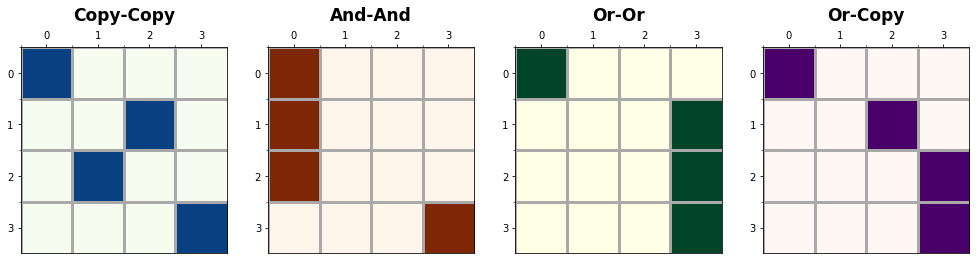

In [13]:
A = np.array([[1.0,0,0,0],[0,0,1.0,0],[0,0,0,1.0],[0,0,0,1.0]])
labels=["Copy-Copy\n", "And-And\n", "Or-Or\n", "Or-Copy\n"]
save = False
plot_four_TPMS(define_TPM("copycopy"), define_TPM("andand"), 
               define_TPM("oror"), A, labels, save)

### 1.5.10 Copy-Copy

In [14]:
print("Copy-Copy Network:")
A = np.array([[1.0,0,0,0],[0,0,1.0,0],[0,1.0,0,0],[0,0,0,1.0]])
print(A)
print(" ")
print("\tEffective Information (EI): \t", np.round(get_ei(A), 6))
print("\tEffective Information (DD): \t", np.round(get_ei_dd(A), 6))

Copy-Copy Network:
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]
 
	Effective Information (EI): 	 2.0
	Effective Information (DD): 	 2.0


### 1.5.11 And-And

In [15]:
print("And-And Network:")
A = np.array([[1.0,0,0,0],[1.0,0,0,0],[1.0,0,0,0],[0,0,0,1.0]])
print(A)
print(" ")
print("\tEffective Information (EI): \t", np.round(get_ei(A), 6))
print("\tEffective Information (DD): \t", np.round(get_ei_dd(A), 6))

And-And Network:
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]
 
	Effective Information (EI): 	 0.811278
	Effective Information (DD): 	 0.811278


### 1.5.2 Copy-Copy (with noise, 1.00 changed to 0.97)

In [16]:
print("Noisy Copy-Copy Network:")
A = np.array([[0.97,0.01,0.01,0.01],[0.01,0.01,0.97,0.01],
              [0.01,0.97,0.01,0.01],[0.01,0.01,0.01,0.97]])
print(A)
print(" ")
print("\tEffective Information (EI): \t", np.round(get_ei(A), 6))
print("\tEffective Information (DD): \t", np.round(get_ei_dd(A), 6))

Noisy Copy-Copy Network:
[[0.97 0.01 0.01 0.01]
 [0.01 0.01 0.97 0.01]
 [0.01 0.97 0.01 0.01]
 [0.01 0.01 0.01 0.97]]
 
	Effective Information (EI): 	 1.758059
	Effective Information (DD): 	 1.758059


### 1.5.3 Or-Copy

In [17]:
print("Or-Copy Network:")
A = np.array([[1.0,0,0,0],[0,0,1.0,0],[0,0,0,1.0],[0,0,0,1.0]])
print(A)
print(" ")
print("\tEffective Information (EI): \t", np.round(get_ei(A), 6))
print("\tEffective Information (DD): \t", np.round(get_ei_dd(A), 6))

Or-Copy Network:
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
 
	Effective Information (EI): 	 1.5
	Effective Information (DD): 	 1.5


### 1.5.4 Random Matrices

In [18]:
print("Random Matrix:")
pp = np.random.rand(4,4)
pp = np.array([pp[i]/sum(pp[i]) for i in range(len(pp))])
print(pp)
print(" ")
print("\tEffective Information (EI): \t", np.round(get_ei(pp), 6))
print("\tEffective Information (DD): \t", np.round(get_ei_dd(pp), 6))

Random Matrix:
[[0.37683652 0.0006459  0.32427878 0.29823881]
 [0.18404986 0.23242761 0.3349183  0.24860423]
 [0.34265884 0.14675147 0.32477917 0.18581052]
 [0.06026785 0.29078429 0.43005704 0.21889082]]
 
	Effective Information (EI): 	 0.142095
	Effective Information (DD): 	 0.142095


## End of Chapter 01. In Chapter 02, we will look at the $EI$ of prototypical networks
_______________

### References:
- __[Hoel, E. P. (2017). When the Map Is Better Than the Territory. Entropy, 19(5), 188. doi: 10.3390/e19050188](http://www.mdpi.com/1099-4300/19/5/188)__
- __[Hoel, E. P., Albantakis, L., & Tononi, G. (2013). Quantifying causal emergence shows that macro can beat micro. Proceedings of the National Academy of Sciences, 110(49), 19790–5. doi: 10.1073/pnas.1314922110](http://www.pnas.org/content/110/49/19790)__
- __[Tononi, G. (2001). Information measures for conscious experience. Archives Italiennes de Biologie,139(4), 367–371.  doi: 10.4449/aib.v139i4.51](https://www.ncbi.nlm.nih.gov/pubmed/11603079)__

__________________

# Causal Structure as a Network: Quantifying Certainty in Complex Systems

# Chapter 02: Network Size and Effective Information

## Random Networks
We first examined the effective information of networks with different sizes and structures, asking basic questions about the relationship between a network's $EI$ to its size, number of edges, and network structure. These inquiries eventually allow for the exhaustive classification and quantification of different causal structures. For simplicity and generality, we start by examining the $EI$ in undirected networks.

It is perhaps intuitive that the $EI$ of a network will increase as the network grows in size. The upper bound of $EI$ in a network of $N$ nodes is log$_2(N)$, and adding more nodes should also increase the available repertoire of counterfactuals or states, which should in turn increase the informativeness of the causal structure. While we describe multiple classes of networks where $EI$ grows as a function of network size, this is not always so.

Here, we show a comparison between the number of nodes in a network and that network's $EI$, using two canonical network structures---Erdös-Rényi (ER) random graphs (Erdös & Rényi, 1959; Bollobas, 1984) and Barabási-Albert (BA) networks (Barabasi & Albert, 1999). As both classes of networks grow in size, the BA networks continue increasing in $EI$. Interestingly, the $EI$ in ER networks converges to a value of $-\text{log}_2(p)$, where $p$ is the probability that any two nodes in the network will be connected
____________________________________________________________________________

## Upper and Lower Limits to Effective Information in Networks
The fixed information in random causal structures is fundamental to the notion of causal structures as networks. After a certain point, a causal structure that is grown randomly does not gain information as its size increase. Its $EI$ is dominated solely by the probability that any two nodes will be connected, $p$, such that the $EI$ of a random network will be $-\text{log}_2(p)$. This is not the case in Barabási-Albert (BA) networks. Such a key difference suggests there is something intrinsic to the topology of an organized network where each new node contributes to minimizing uncertainty. That is, $EI$ increases as a function of $N$ if it was created under rules which evince structure (like a BA network), whereas for a network with a random topology it does not.

Here, we will see an important relationship between the $EI$ and a network's density. Sparse, connected networks offer the most certainty about cause and effects and therefore will likely have higher $EI$. As the network becomes more dense, however, we see that the $EI$ drops off. This shift occurs in ER networks at approximately $\langle k \rangle = \text{log}_2(N)$, which is also the point at which we can expect all nodes to be in a giant component (Barabási, 2016). Importantly, if the network is maximally dense (i.e. a fully connected network, with self-loops), $EI=0.00$. However, we expect such dense low-$EI$ structures to not be common, since network structures found in nature and society tend to be sparse (Del Genio, Gross, & Bassler, 2011).

To see the clear relationship between network connectivity and $EI$, compare the $EI$ of $d$-dimensional ring-lattices to that of hub-and-spoke star networks. The two form striking bounds, between which we expect most real networks to fall. That is, for undirected networks, the 1-dimensional ring lattice represents the upper bound where $\langle k \rangle = 2.00$, and the $EI$ scales with $\text{log}_{2}(N) - \text{log}_{2}(2d)$. $N$ is the number of nodes and $d$ is the dimension of the ring-lattice (i.e., $d=1$ is a cycle and is shown in this notebook, $d=2$ is a taurus, etc.). On the opposite end of the spectrum, an all-to-all undirected network have zero $EI$. Comparatively, as the size of star networks increase, their $EI$ approaches 0.00. 

The picture that begins to emerge is that $EI$ is inextricably linked to the pattern of connectivity and therefore the motifs present in the network. In the following section, we explore the $EI$ of three-node directed network motifs in order to understand further why certain structures offer different amounts of information about causes and effects in a system. This also allows us to understand exactly why $EI$ is an appropriate metric of causation.

# 2.0 Network Size and Effective Information
## 2.0.1 Comparing Erdos-Renyi and Barabási-Albert Networks

In [24]:
p0 = 0.0
N = 2000 
network_sizes = np.linspace(10, N, 20, dtype=int)
ms = [2, 7]
ps = [0.01, 0.04] 
n_sim = 5
ei_er = []
ei_ba = []

for i in range(len(ms)):
    ei_er_temp = []
    ei_ba_temp = []
    for N in network_sizes:
        temp_ba = 0
        temp_er = 0
        for num_sim in range(n_sim):
            Gba = nx.barabasi_albert_graph(N, ms[i])
            Ger = nx.erdos_renyi_graph(N, ps[i])
            temp_ba += get_ei(Gba, p0)
            temp_er += get_ei(Ger, p0)
        
        ei_er_temp.append(temp_er/n_sim)
        ei_ba_temp.append(temp_ba/n_sim)

    ei_er.append(ei_er_temp)
    ei_ba.append(ei_ba_temp)

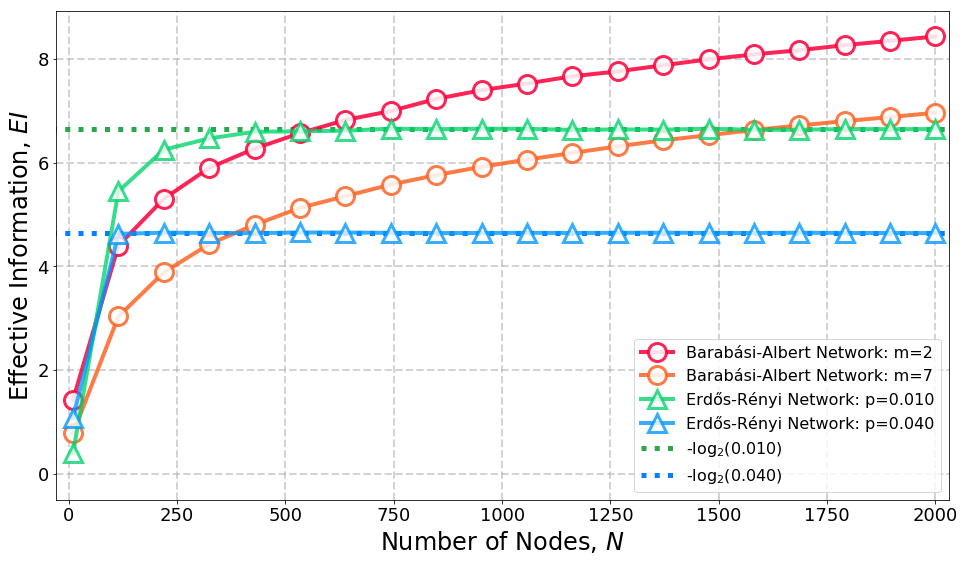

In [27]:
plt.figure(figsize = (16,9))
plt.plot(network_sizes, ei_ba[0], alpha=0.86, marker='o', 
         markersize=18.0, color="#ff003a", markerfacecolor='w', 
         markeredgewidth=3, linewidth=4.0, 
         label="Barabási-Albert Network: m=%s"%ms[0])
plt.plot(network_sizes, ei_ba[1], alpha=0.86, marker='o', 
         markersize=18.0, color="#fd6526", markerfacecolor='w',
         markeredgewidth=3, linewidth=4.0, 
         label="Barabási-Albert Network: m=%s"%ms[1])
plt.plot(network_sizes, ei_er[0], alpha=0.78, marker='^', 
         markersize=18.0, color="#00d46a", markerfacecolor='w', 
         markeredgewidth=3, linewidth=4.0, 
         label="Erdős-Rényi Network: p=%.3f"%ps[0])
plt.hlines(-np.log2(ps[0]), -100, max(network_sizes)+100, 
           alpha=0.89, linestyles=':', color="#0d9e35", 
           linewidth=5.0, label=r"-log$_2$(%.3f)"%ps[0])
plt.plot(network_sizes, ei_er[1], alpha=0.78, marker='^', 
         markersize=18.0, color="#0096ff", markerfacecolor='w',
         markeredgewidth=3, linewidth=4.0, 
         label="Erdős-Rényi Network: p=%.3f"%ps[1])
plt.hlines(-np.log2(ps[1]), -100, max(network_sizes)+100, 
           alpha=0.99, linestyles=':', color="#007dff", 
           linewidth=5.0, label=r"-log$_2$(%.3f)"%ps[1])

plt.xlabel("Number of Nodes, $N$", size=24)
plt.ylabel("Effective Information, $EI$", size=24)
plt.xticks(size=18)
plt.yticks(size=18)
plt.ylim(-.5,max(ei_ba[0])+0.5)
plt.xlim(-30.0, N+30)
plt.grid(True, linestyle='--', linewidth=2.0, alpha=0.55)
plt.legend(fontsize=16)#, loc=2)

# plt.savefig("../figs/pngs/EI_compareERBA.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/EI_compareERBA.pdf", bbox_inches='tight')
plt.show()

## 2.0.1 ER Networks, continued

In [284]:
max_N = 2500
n_params = 60
ps = np.logspace(-8.5, 0, n_params)
network_sizes = np.linspace(5, max_N, int(n_params/2), dtype=int)
n_sim = 4
ei_dict = {}

for N in network_sizes:
    ei_er_p = []
    for p in ps:
        temp = 0
        for num_sim in range(n_sim):
            Ger = nx.erdos_renyi_graph(N, p)
            temp += get_ei(Ger, p0)
        ei_er_p.append(temp/n_sim)
    ei_dict[N] = ei_er_p

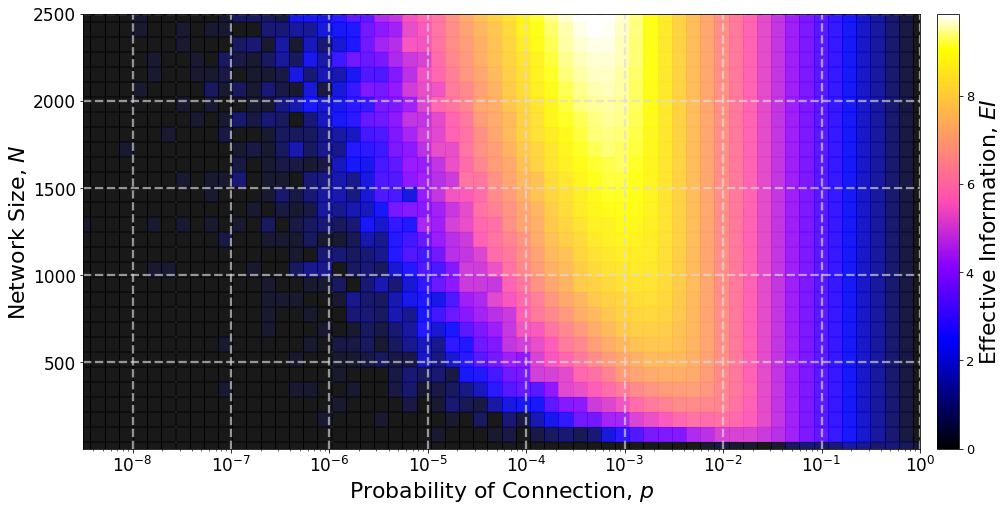

In [349]:
max_ei = max([max(p) for p in list(ei_dict.values())])-0.05
min_ei = 0
ei_range = np.linspace(min_ei, max_ei, len(ps))

fig, ax = plt.subplots(figsize=(18,8))

m = plt.cm.ScalarMappable(cmap=plt.cm.gnuplot2)
min_x = min(np.array([min(ei_dict.keys())]*len(network_sizes))*np.array(network_sizes))
max_x = max(np.array([max(ei_dict.keys())]*len(network_sizes))*np.array(network_sizes))

for N in ei_dict.keys():
    colors = [plt.cm.gnuplot2(np.array(ei_dict[N])/max_ei)][0]
    ax.scatter(ps, [N]*len(ps), s=200, alpha=0.9, marker="s", c=colors)
    ax.set_xscale('log')

m.set_array(ei_range)
cbar = plt.colorbar(m, pad=0.017)
cbar.ax.tick_params(labelsize=13) 
plt.grid(True, linestyle='--', linewidth=2.25, alpha=0.65, color='gainsboro')
cbar.set_label("Effective Information, $EI$", size=22)
plt.ylabel(r"Network Size, $N$", size=22)
plt.xlabel(r"Probability of Connection, $p$", size=22)
plt.xticks(size=17)
plt.yticks(size=17)
plt.xlim((min(ps), max(ps)))
plt.ylim((min(network_sizes), max(network_sizes)))

# plt.savefig("../figs/pngs/EffectiveInformation_ER_Growth_N2500_p.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/EffectiveInformation_ER_Growth_N2500_p.pdf", bbox_inches='tight')
plt.show()

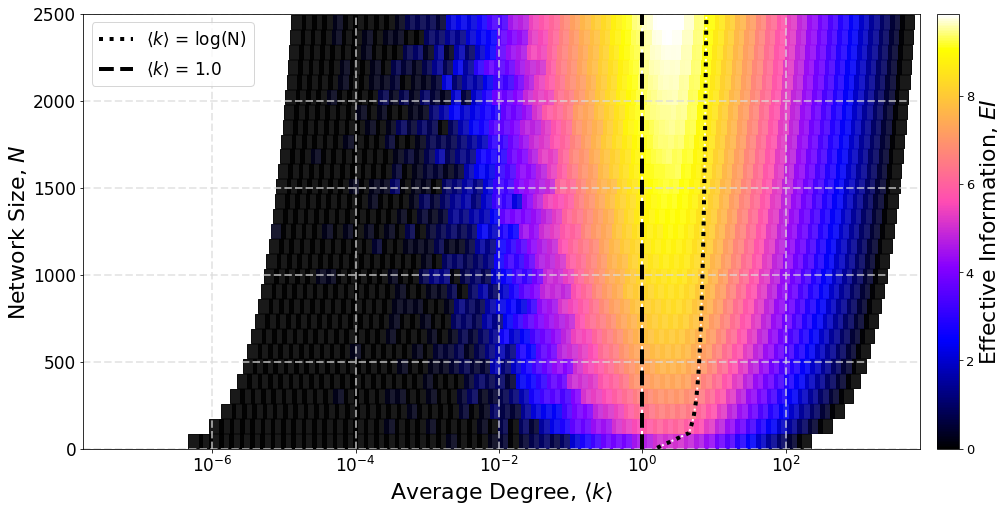

In [346]:
fig, ax = plt.subplots(figsize=(18,8))

m = plt.cm.ScalarMappable(cmap=plt.cm.gnuplot2)
min_x = min(np.array([min(ei_dict.keys())]*len(network_sizes))*np.array(network_sizes))
max_x = max(np.array([max(ei_dict.keys())]*len(network_sizes))*np.array(network_sizes))

for N in ei_dict.keys():
    colors = [plt.cm.gnuplot2(np.array(ei_dict[N])/max_ei)][0]
    ax.scatter(2*ps*N, [N-45]*len(ps), s=195, alpha=0.9, marker="s", c=colors)
    ax.set_xscale('log')

plt.plot(np.log(network_sizes), network_sizes, linewidth=2.0, linestyle=':', color='white')
plt.vlines(1., 1, max(network_sizes), linewidth=2.0, linestyles = '--', color='white')
plt.vlines(1., 1, max(network_sizes), linewidth=4.0, linestyles = '--', color='k', 
           label=r"$\langle k \rangle$ = 1.0")
plt.plot(np.log(network_sizes), network_sizes, linewidth=4.0, linestyle=':', color='k', 
           label=r"$\langle k \rangle$ = log(N)")

m.set_array(ei_range)
cbar = plt.colorbar(m, pad=0.017)
cbar.ax.tick_params(labelsize=13) 
cbar.set_label("Effective Information, $EI$", size=22)
plt.grid(True, linestyle='--', linewidth=2.0, alpha=0.65, color='gainsboro')
plt.ylabel(r"Network Size, $N$", size=22)
plt.xlabel(r"Average Degree, $\langle k \rangle$", size=22)
plt.xticks(size=17)
plt.yticks(size=17)
plt.xlim(min(ps)*min(network_sizes), max(ps)*max(network_sizes)*3)
plt.ylim(0, max(network_sizes))#
plt.legend(fontsize=17)

# plt.savefig("../figs/pngs/EffectiveInformation_ER_Growth_N2500_k.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/EffectiveInformation_ER_Growth_N2500_k.pdf", bbox_inches='tight')
plt.show()

## 2.1.0 Comparing Star Networks to Ring Lattice Networks
______________________________________

In [354]:
ei_star = []
ei_line = []
net_size = []
network_sizes = np.array(sorted(list(set(np.logspace(0,3.5,50,dtype=int)))))
line_dict = {}
star_dict = {}

for N in network_sizes:
    G_star = nx.star_graph(N+1) # weird thing about this function: it produces a graph with N+1 nodes
    G_line = nx.watts_strogatz_graph(N+2, 2, 0)
    ei_star.append(get_ei(G_star, p0))
    ei_line.append(get_ei(G_line, p0))
    net_size.append(N+2)
    star_dict[N+2] = get_ei(G_star, p0)
    line_dict[N+2] = get_ei(G_line, p0)
    
star_x = list(star_dict.keys())[0::2]
star_y = list(star_dict.values())[0::2]
line_x = list(line_dict.keys())[0::2]
line_y = list(line_dict.values())[0::2]

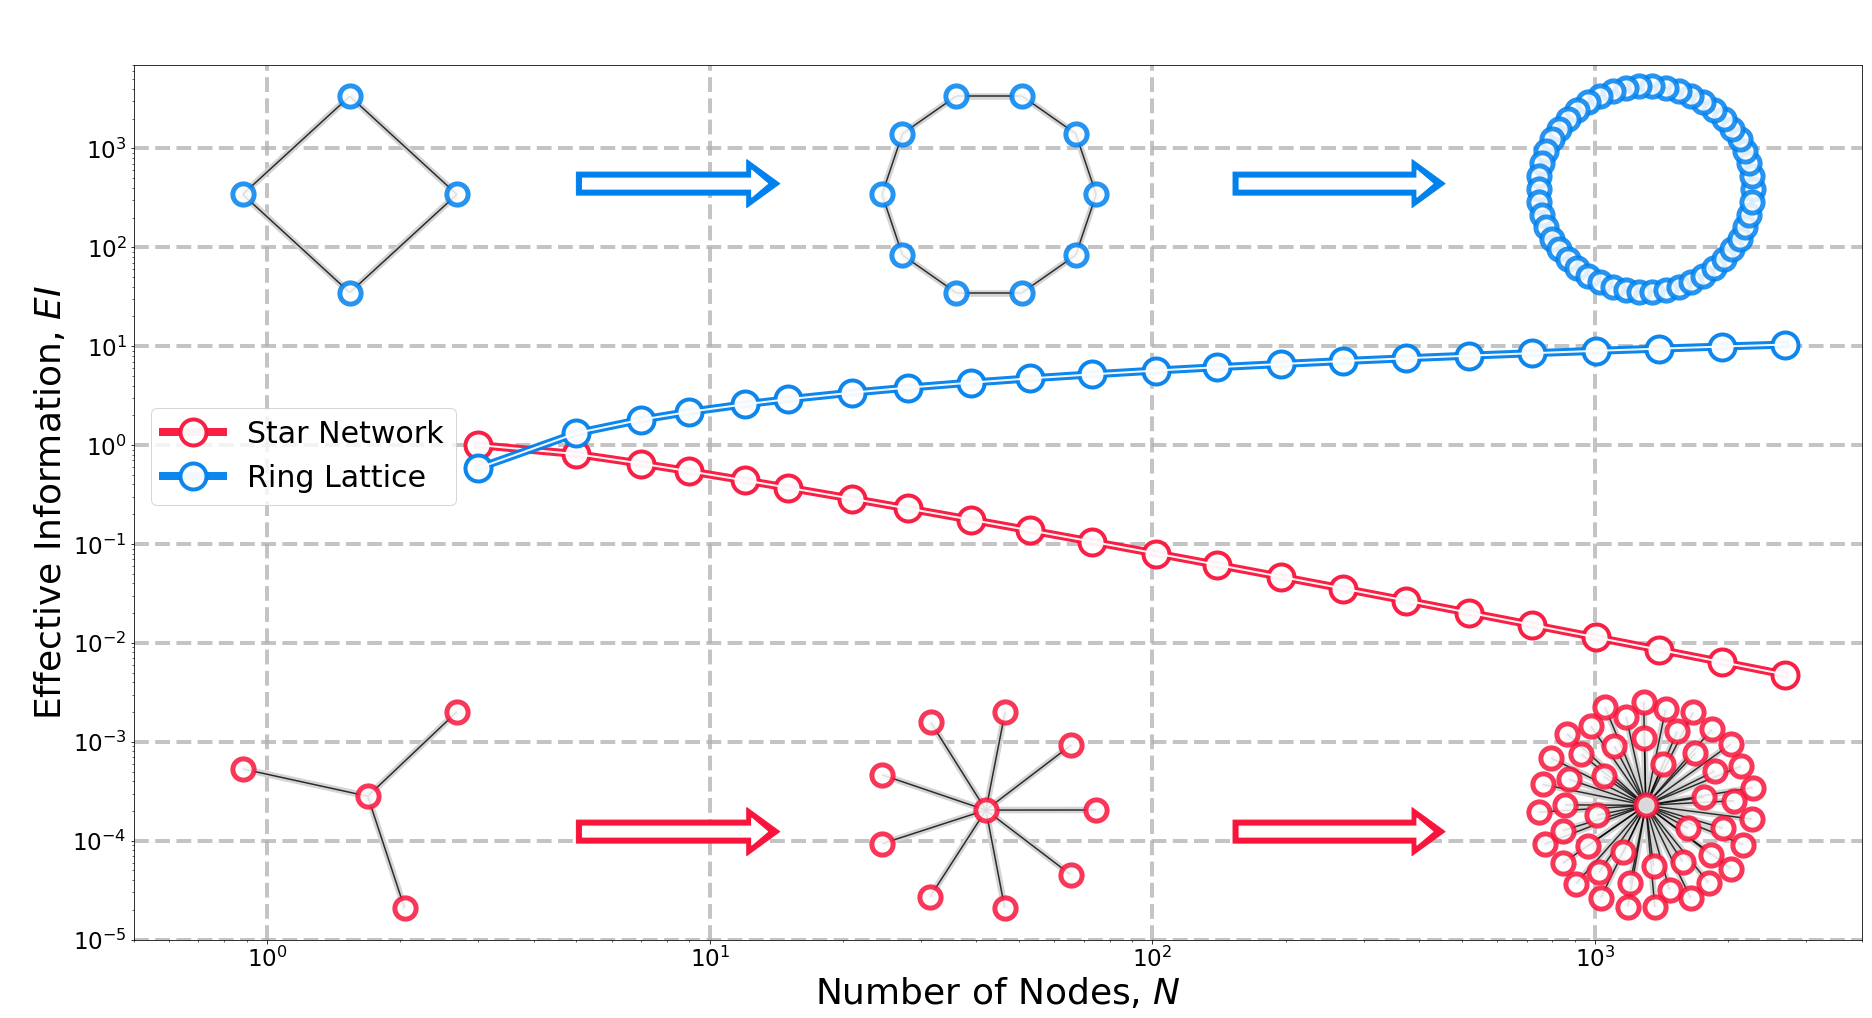

In [355]:
fig, ax = plt.subplots(figsize=(24,15))

plt.loglog(star_x, star_y, alpha=0.95, marker='o', markersize=26.0, markerfacecolor='w', 
           color='#f9143b', markeredgewidth=4, linewidth=8.0, label="Star Network")
plt.loglog(star_x, star_y, alpha=0.95, marker='', color='w', linewidth=2.0)
plt.loglog(line_x, line_y, alpha=0.95, marker='o', markersize=26.0, markerfacecolor='w', 
           color='#0081ee', markeredgewidth=4, linewidth=8.0, label="Ring Lattice")
plt.loglog(line_x, line_y, alpha=0.95, marker='', color='w', linewidth=2.0)#

plt.grid(True, linestyle='--', linewidth=4.0, alpha=0.75)
plt.xlabel("Number of Nodes, $N$", size=36)
plt.ylabel("Effective Information, $EI$", size=36)
plt.xticks(size=23)
plt.yticks(size=23)
plt.legend(fontsize=30, bbox_to_anchor=[0.195, 0.625])
plt.xlim((0.5,4000))
plt.ylim((0.00001, 7000.25))

###############
plt.axes([0.05, 0.68, 0.15, 0.22])
G = nx.watts_strogatz_graph(4, 2, 0.0)
plt.axis('off')
pos11 = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos11, node_color='white', node_size=450, 
                       linewidths=5, alpha=0.85).set_edgecolor('#0081ee')
nx.draw_networkx_edges(G, pos11, edge_color="lightgrey", width=6.55, alpha=0.98)
nx.draw_networkx_edges(G, pos11, edge_color="black", width=1.5, alpha=0.8)

plt.axes([0.42, 0.68, 0.15, 0.22])
G = nx.nx.watts_strogatz_graph(10, 2, 0.0)
plt.axis('off')
pos12 = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos12, node_color='white', node_size=450, 
                       linewidths=5, alpha=0.85).set_edgecolor('#0081ee')
nx.draw_networkx_edges(G, pos12, edge_color="lightgrey", width=6.55, alpha=0.98)
nx.draw_networkx_edges(G, pos12, edge_color="black", width=1.5, alpha=0.8)

plt.axes([0.8, 0.68, 0.15, 0.23])
G = nx.watts_strogatz_graph(50, 2, 0.0)
plt.axis('off')
pos13 = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos13, node_color='white', node_size=450, 
                       linewidths=5, alpha=0.85).set_edgecolor('#0081ee')
nx.draw_networkx_edges(G, pos13, edge_color="lightgrey", width=6.55, alpha=0.98)
nx.draw_networkx_edges(G, pos13, edge_color="black", width=1.5, alpha=0.8)

###############
plt.axes([-0.06, 0.76, 0.5, 0.20])
plt.axis('off')
style="Simple,head_length=33,head_width=48,tail_width=23"
arrow11 = arrow11 = mpatches.FancyArrowPatch((0.63,0.2), (0.870,0.2), 
                                             arrowstyle=style, color="#0081ee")
plt.gca().add_patch(arrow11)
style="Simple,head_length=16,head_width=27,tail_width=11"
arrow12 = arrow12 = mpatches.FancyArrowPatch((0.637,0.2), (0.856,0.2), 
                                             arrowstyle=style, color ='w')
plt.gca().add_patch(arrow12)

plt.axes([0.26, 0.76, 0.5, 0.20])
plt.axis('off')
style="Simple,head_length=33,head_width=48,tail_width=23"
arrow21 = arrow21 = mpatches.FancyArrowPatch((0.75,0.2), (1.0,0.2), 
                                             arrowstyle=style, color="#0081ee")
plt.gca().add_patch(arrow21)
style="Simple,head_length=16,head_width=27,tail_width=11"
arrow22 = arrow22 = mpatches.FancyArrowPatch((0.757,0.2), (0.986,0.2), 
                                             arrowstyle=style, color ='w')
plt.gca().add_patch(arrow22)

###############
plt.axes([0.05, 0.11, 0.15, 0.22])
G = nx.star_graph(3)
plt.axis('off')
pos21 = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos21, node_color='white', node_size=450, 
                       linewidths=5, alpha=0.85).set_edgecolor('#f9143b')
nx.draw_networkx_edges(G, pos21, edge_color="lightgrey", width=6.55, alpha=0.98)
nx.draw_networkx_edges(G, pos21, edge_color="black", width=1.5, alpha=0.8)

plt.axes([0.42, 0.11, 0.15, 0.22])
G = nx.star_graph(9)
plt.axis('off')
pos22 = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos22, node_color='white', node_size=450, 
                       linewidths=5, alpha=0.85).set_edgecolor('#f9143b')
nx.draw_networkx_edges(G, pos22, edge_color="lightgrey", width=6.55, alpha=0.98)
nx.draw_networkx_edges(G, pos22, edge_color="black", width=1.5, alpha=0.8)

plt.axes([0.8, 0.11, 0.15, 0.23])
G = nx.star_graph(49)
plt.axis('off')
pos23 = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos23, node_color='white', node_size=450, 
                       linewidths=5, alpha=0.85).set_edgecolor('#f9143b')
nx.draw_networkx_edges(G, pos23, edge_color="lightgrey", width=6.55, alpha=0.98)
nx.draw_networkx_edges(G, pos23, edge_color="black", width=1.5, alpha=0.8)

###############
plt.axes([-0.06, 0.16, 0.5, 0.20])
plt.axis('off')
style="Simple,head_length=33,head_width=48,tail_width=23"
arrow11 = arrow11 = mpatches.FancyArrowPatch((0.63,0.2), (0.870,0.2), 
                                             arrowstyle=style, color="#f9143b")
plt.gca().add_patch(arrow11)
style="Simple,head_length=16,head_width=27,tail_width=11"
arrow12 = arrow12 = mpatches.FancyArrowPatch((0.637,0.2), (0.856,0.2), 
                                             arrowstyle=style, color ='w')
plt.gca().add_patch(arrow12)

plt.axes([0.26, 0.16, 0.5, 0.20])
plt.axis('off')
style="Simple,head_length=33,head_width=48,tail_width=23"
arrow21 = arrow21 = mpatches.FancyArrowPatch((0.75,0.2), (1.0,0.2), 
                                             arrowstyle=style, color="#f9143b")
plt.gca().add_patch(arrow21)
style="Simple,head_length=16,head_width=27,tail_width=11"
arrow22 = arrow22 = mpatches.FancyArrowPatch((0.757,0.2), (0.986,0.2), 
                                             arrowstyle=style, color ='w')#color="#0081ee",
plt.gca().add_patch(arrow22)

plt.subplots_adjust(top = .91, bottom = .1, right = 1, left = 0, hspace = 0, wspace = 0)
# plt.savefig("../figs/pngs/EffectiveInformation_Compare_StarLine.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/EffectiveInformation_Compare_StarLine.pdf", bbox_inches='tight')
plt.show()

## End of Chapter 02. In Chapter 03, we will look at the $EI$ of network motifs
_______________

In [2]:
# under tests

In [162]:
def preferential_attachment_network(N, alpha=1.0, m=1):
    """
    sublinear, linear, or superlinear preferential attachment
    """
    G = nx.Graph()
    G.add_edge(0,1)
    for node_i in range(2,N):
        degrees = np.array(list(dict(G.degree()).values()))
        probs = (degrees**alpha) / sum(degrees**alpha)
        eijs = np.random.choice(G.number_of_nodes(), size=(m,), replace=False, p=probs)
        for node_j in eijs:
            G.add_edge(node_i, node_j)
    
    return G

In [289]:
p0 = 0.0
N = 2000
nsamps = 20
n_sim = 50
network_sizes = np.logspace(1, np.log10(N), nsamps, dtype=int)
alphas = np.array([0.0, 0.5, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.5])

In [290]:
ms = [1]
out_dict = {}

for alpha in alphas:
    print(alpha)
    alpha_temp = {}
    for m in ms:
        m_temp = []
        for N in network_sizes:
#             print(N)
            N_temp = []
            for num_sim in range(n_sim):
                G = preferential_attachment_network(N, alpha, m)

                N_temp.append(get_ei(G, p0))
            m_temp.append(N_temp)

        alpha_temp[m] = m_temp
        
    out_dict[alpha] = alpha_temp

0.0
0.5
1.0
1.2
1.4
1.6
1.8
2.0
2.5


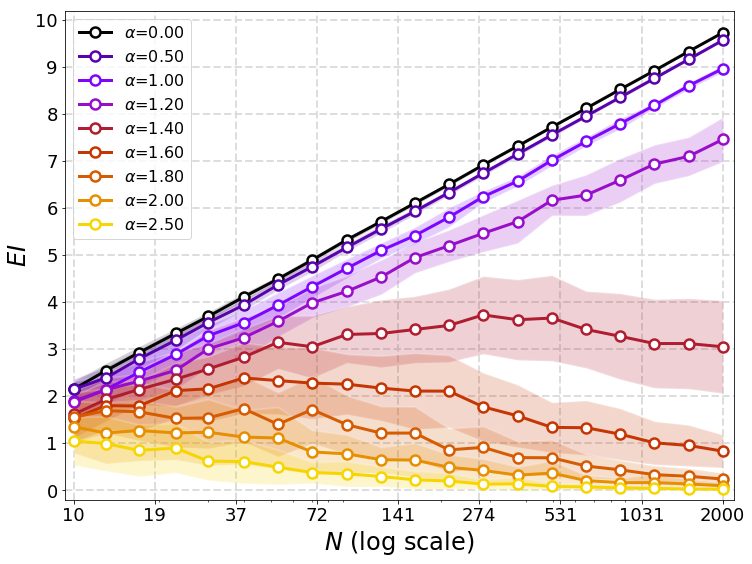

In [297]:
mult=1
plt.figure(figsize = (12*mult,9*mult))
m_shapes = dict(zip(ms,['o','^','s','+']))
alpha_colors = plt.cm.gnuplot(np.array(list(range(len(alphas))))/(max(np.array(list(range(len(alphas)))))+0.5))
alpha_colors = dict(zip(alphas, alpha_colors))
# alpha_colors = dict(zip(alphas, np.flip(alpha_colors, axis=0)))
labs = ['- Random Tree', '', '- Barabási-Albert', '', '', '', '', '', '- Star-like Tree']

maxEI=0
minEI=1
counter = 0
for alpha in alphas:
    for m in ms:
        data = out_dict[alpha]
        EI_N_list = np.mean(out_dict[alpha][m],axis=1)
        if max(EI_N_list) > maxEI:
            maxEI = max(EI_N_list)
        if min(EI_N_list) < minEI:
            minEI = min(EI_N_list)
        m_temp_stdv = np.std(out_dict[alpha][m],axis=1)
        fillb = EI_N_list-m_temp_stdv
        fillb[fillb<0] = 0
        plt.fill_between(network_sizes, fillb,EI_N_list+m_temp_stdv, 
                         facecolor=alpha_colors[alpha], alpha=0.2, edgecolor='w', linewidth=2.0)
        plt.loglog(network_sizes, EI_N_list, alpha=0.99, marker=m_shapes[1], 
             markersize=10.0, color=alpha_colors[alpha], markerfacecolor='w', 
             markeredgewidth=2.5, linewidth=3.0, 
             label=r"$\alpha$=%.2f"%(alpha))
#              label=r"$\alpha$=%.2f %s"%(alpha, labs[counter]))
    counter += 1

plt.xlabel(r"$N$ (log scale)", size=24)
# plt.xlabel("Number of Nodes, $N$", size=24)
plt.ylabel(r"$EI$", size=24)
# plt.ylabel("Effective Information, $EI$", size=24)
plt.yscale('linear')
xtix = np.logspace(np.log10(min(network_sizes)), np.log10(max(network_sizes)), 9)
ytix = np.linspace(0,10,11,dtype=int)
plt.xticks(xtix, np.array(xtix,dtype=int), size=18)
plt.yticks(ytix, np.round(ytix,2), size=18)
plt.xlim(min(xtix)-0.7, max(xtix)+200)
plt.ylim(-0.2, 10.2)
plt.grid(True, linestyle='--', color='gainsboro', linewidth=2.0, alpha=0.95)
plt.legend(fontsize=16)
# plt.savefig("../figs/pngs/EI_compare_prefattach_alphas_m1.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/EI_compare_prefattach_alphas_m1.pdf", bbox_inches='tight')
plt.show()

In [293]:
ps = np.logspace(-3.2,-1,9)
out_dictp = {}

for p in ps:
    print(p)
    p_temp = []
    for N in network_sizes:
#         print(N)
        N_temp = []
        for num_sim in range(n_sim):
            G = nx.erdos_renyi_graph(N, p)
            N_temp.append(get_ei(G, p0))
        
        p_temp.append(N_temp)
        
    out_dictp[p] = p_temp

0.00063095734448
0.00118850222744
0.00223872113857
0.00421696503429
0.00794328234724
0.0149623565609
0.0281838293126
0.0530884444231
0.1


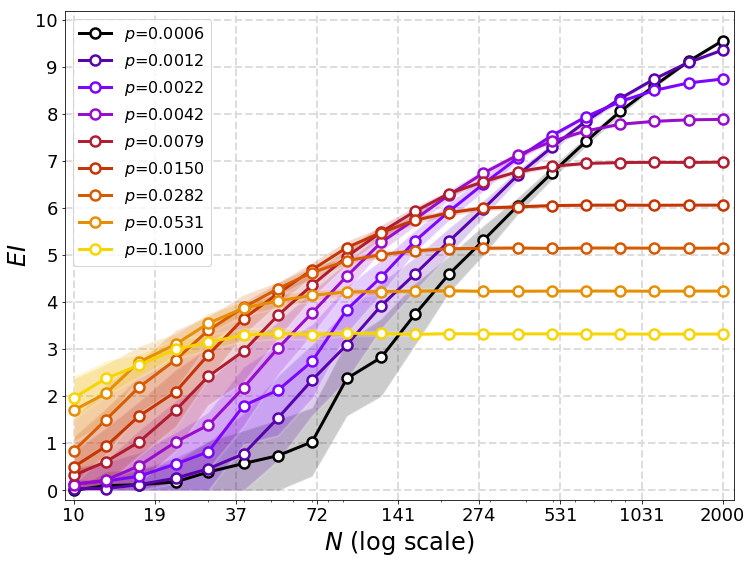

In [296]:
mult=1
plt.figure(figsize = (12*mult,9*mult))
m_shapes = dict(zip(ms,['o','^','s','+']))
p_colors = plt.cm.gnuplot(np.array(list(range(len(ps))))/(max(np.array(list(range(len(ps)))))+0.5))
p_colors = dict(zip(ps, p_colors))

maxEI=0
minEI=1
counter = 0
for p in ps:
    data = out_dictp[p]
    EI_N_list = np.mean(out_dictp[p],axis=1)
    if max(EI_N_list) > maxEI:
        maxEI = max(EI_N_list)
    if min(EI_N_list) < minEI:
        minEI = min(EI_N_list)
    m_temp_stdv = np.std(out_dictp[p],axis=1)
    fillb = EI_N_list-m_temp_stdv
    fillb[fillb<0] = 0
    plt.fill_between(network_sizes, fillb,EI_N_list+m_temp_stdv, 
                     facecolor=p_colors[p], alpha=0.2, edgecolor='w', linewidth=2.0)
    plt.loglog(network_sizes, EI_N_list, alpha=0.99, marker=m_shapes[1], 
         markersize=10.0, color=p_colors[p], markerfacecolor='w', 
         markeredgewidth=2.5, linewidth=3.0, 
         label=r"$p$=%.4f"%(p))
    counter += 1

plt.xlabel(r"$N$ (log scale)", size=24)
# plt.xlabel("Number of Nodes, $N$", size=24)
plt.ylabel(r"$EI$", size=24)
# plt.ylabel("Effective Information, $EI$", size=24)
plt.yscale('linear')
ytix = np.linspace(0,10,11,dtype=int)
plt.xticks(xtix, np.array(xtix,dtype=int), size=18)
plt.yticks(ytix, np.round(ytix,2), size=18)
plt.xlim(min(xtix)-0.7, max(xtix)+200)
plt.ylim(-0.2, 10.2)
plt.grid(True, linestyle='--', color='gainsboro', linewidth=2.0, alpha=0.95)
plt.legend(fontsize=16)
# plt.savefig("../figs/pngs/EI_compare_ER_ps.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/EI_compare_ER_ps.pdf", bbox_inches='tight')
plt.show()

### References:
- __[Barabási, A.-L. & Albert, R. (1999). Emergence of scaling in random networks. Science, 286 (October), 509–512. doi: 10.1126/science.286.5439.509](http://barabasi.com/f/67.pdf)__
- __[Barabási, A.-L. (2016). Network Science. Cambridge University Press. doi: ISBN:9781107076266](http://networksciencebook.com/)__
- __[Del Genio, C. I., Gross, T., & Bassler, K. E. (2011). All scale-free networks are sparse. Physical Review Letters, 107(17), 1–4. doi: 10.1103/PhysRevLett.107.178701](https://physics.aps.org/featured-article-pdf/10.1103/PhysRevLett.107.178701)__
- __[Erdös, P., & Rènyi, A. (1959). On random graphs. Publicationes Mathematicae, 6, 290–297. doi: 10.2307/1999405](http://snap.stanford.edu/class/cs224w-readings/erdos59random.pdf)__

# Causal Structure as a Network: Quantifying Certainty in Complex Systems

# Chapter 03: Determinism and Degeneracy

Determinism and degeneracy are two properties that exist in every causal structure, and they govern the degree of certainty about the relationships between causes and effects in a system based on the network connectivity. A visual explanation of these two quantities are shown this notebook. Determinism and degeneracy can be arrived at by decomposing the KL Divergence that defines $EI$, but since they are fundamental to the notion of causality, they can also be built up from first principles, as we do here.

Previously we defined an intervention as introducing random walkers on a node in the network, $do_{net}(v_i)$. The amount of uncertainty in the paths of those random walkers is how much information is lost from noise if the random walker is placed on a $v_i$. This is in turn a function of the strength of the output of a node, i.e., the certainty of transitions or dependencies (the determinism of those transition profiles). Therefore we define the determinism using the average entropy of $W^{out}_{i}$ and the degeneracy with the entropy of $W^{in}$ such that:

\begin{align}
    \text{determinism} &= \text{log}_2(N) - \dfrac{1}{N_{out}}\displaystyle \sum_i^{N_{out}} H[W^{out}_{i}] \tag{4}\\\
    \text{degeneracy} &= \text{log}_2(N) - H[W^{in}] \tag{5}
\end{align}

_______________________________

In a maximally deterministic system wherein all nodes have a single output and every entry in $W^{out}_{i}=1.00$, the determinism is just $\text{log}_2(N)$ because their $H[W^{out}_{i}]=0.00$. Conversely, the degeneracy is the amount of information lost via an overlap in input weights (e.g. if multiple nodes output to the same node). The degeneracy is $\text{log}_2(N) - H[W^{in}]$. In a perfectly non-degenerate system wherein all nodes have an equal input weight, the degeneracy is zero because $H[W^{in}] \approx H_{max}$.

These two quantities provide clear explanations for why canonical networks have the $EI$ they do. For example, as the size of an Erdös-Rényi random network increases, its value for degeneracy approaches zero, which means the the $EI$ of a random network is driven only by the determinism of the network. Similarly, in $d$-dimensional ring lattice networks, the degeneracy term is always zero. Therefore, the \textit{EI} of a ring lattice structure reduces to the determinism of that structure. Ring networks with an average degree $\langle k \rangle$ will have a higher $EI$ than ER networks with the same average degree because ring networks will have a higher determinism value. Interestingly, in the case of star networks, the degeneracy term governs the decay of the $EI$ such that hub-and-spoke-like structures quickly become uninformative in terms of cause and effect.

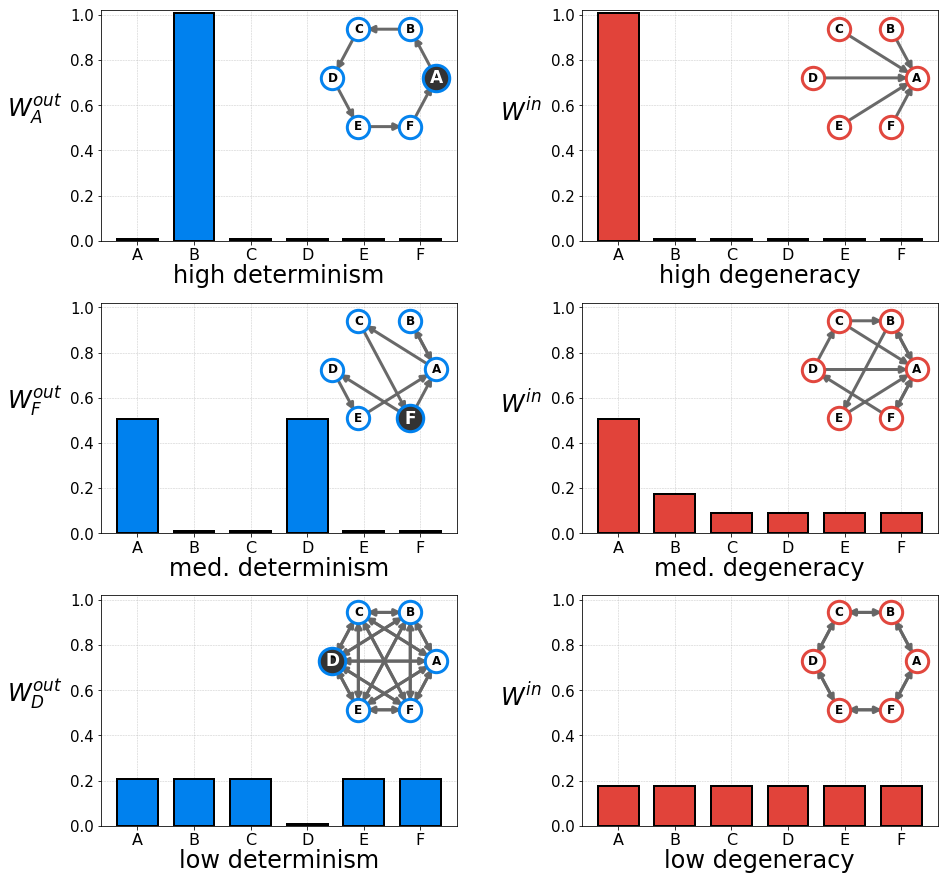

In [2]:
fig, ((ax00, ax01), (ax02, ax03), (ax04, ax05)) = plt.subplots(3, 2, figsize=(15,15))

N = 6

plt.axes([0.325, 0.755, 0.125, 0.125])
G00 = nx.DiGraph()
G00.add_edges_from([(0,1), (1,2), (2,3), (3,4), (4,5), (5,0)])
plt.axis('off')
plt.xlim(-1.3, 1.3)
plt.ylim(-1.2, 1.2)
pos00 = nx.circular_layout(G00)
nx.draw_networkx_nodes(G00, pos00, node_color='white', node_size=500, 
                       linewidths=3.0, alpha=0.98).set_edgecolor('#0081ee')
nx.draw_networkx_nodes(G00, pos00, nodelist=[0], node_color='#333333', linewidths=3.0, 
                       node_size=700).set_edgecolor('#0081ee')
nx.draw_networkx_edges(G00, pos00, edge_color="#666666", width=3.0, alpha=0.98, arrowsize=14)
nx.draw_networkx_labels(G00, pos00, labels=dict(zip([0,1,2,3,4,5], ['A','B','C','D','E','F'])), font_weight='bold')
nx.draw_networkx_labels(G00, pos00, labels=dict(zip([0], ['A'])), font_color='w', font_weight='bold', font_size=17)
ax00.bar(G00.nodes(), get_Wout(G00)[0]+0.009, color='#0081ee', linewidth=2.0, edgecolor='k', width=0.72)
ax00.set_ylim(0.0,1.02)
ax00.set_xticks([0,1,2,3,4,5])
ax00.set_xticklabels(['A','B','C','D','E','F'], fontsize=16)
ax00.set_yticklabels(['0.0','0.2','0.4','0.6','0.8','1.0'], fontsize=15)
ax00.set_ylabel(r'$W_{A}^{out}$', fontsize=24, rotation='horizontal', labelpad=35)
ax00.set_xlabel('high determinism', fontsize=24, labelpad=1)
ax00.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax00.set_axisbelow(True)

plt.axes([0.325, 0.485, 0.125, 0.125])
G01 = nx.DiGraph()
G01.add_edges_from([(0,1), (1,0), (0, 2), (3,4), (2,5), (5,0), (5,3), (4, 0)])
plt.axis('off')
plt.xlim(-1.3, 1.3)
plt.ylim(-1.2, 1.2)
pos01 = nx.circular_layout(G01)
nx.draw_networkx_nodes(G01, pos00, node_color='white', node_size=500, 
                       linewidths=3.0, alpha=0.98).set_edgecolor('#0081ee')
nx.draw_networkx_nodes(G01, pos00, nodelist=[5], node_color='#333333', linewidths=3.0, 
                       node_size=700).set_edgecolor('#0081ee')
nx.draw_networkx_edges(G01, pos00, edge_color="#666666", width=3.0, alpha=0.98, arrowsize=14)
nx.draw_networkx_labels(G01, pos00, labels=dict(zip([0,1,2,3,4,5], ['A','B','C','D','E','F'])), font_weight='bold')
nx.draw_networkx_labels(G01, pos00, labels=dict(zip([5], ['F'])), font_color='w', font_weight='bold', font_size=17)
ax02.bar(G01.nodes(), get_Wout(G01)[5]+0.008, color='#0081ee', linewidth=2.0, edgecolor='k', width=0.72)
ax02.set_ylim(0.0,1.02)
ax02.set_xticks([0,1,2,3,4,5])
ax02.set_xticklabels(['A','B','C','D','E','F'], fontsize=16)
ax02.set_yticklabels(['0.0','0.2','0.4','0.6','0.8','1.0'], fontsize=15)
ax02.set_ylabel(r'$W_{F}^{out}$', fontsize=24, rotation='horizontal', labelpad=35)
ax02.set_xlabel('med. determinism', fontsize=24, labelpad=1)
ax02.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax02.set_axisbelow(True)

plt.axes([0.325, 0.215, 0.125, 0.125])
G02 = nx.complete_graph(N)
G02 = nx.to_directed(G02)
plt.axis('off')
plt.xlim(-1.3, 1.3)
plt.ylim(-1.2, 1.2)
pos02 = nx.circular_layout(G02)
nx.draw_networkx_nodes(G02, pos00, node_color='white', node_size=500, 
                       linewidths=3.0, alpha=0.98).set_edgecolor('#0081ee')
nx.draw_networkx_nodes(G02, pos00, nodelist=[3], node_color='#333333', linewidths=3.0, 
                       node_size=700).set_edgecolor('#0081ee')
nx.draw_networkx_edges(G02, pos00, edge_color="#666666", width=3.0, alpha=0.98, arrowsize=14)
nx.draw_networkx_labels(G02, pos00, labels=dict(zip([0,1,2,3,4,5], ['A','B','C','D','E','F'])), font_weight='bold')
nx.draw_networkx_labels(G02, pos00, labels=dict(zip([3], ['D'])), font_color='w', font_weight='bold', font_size=17)
ax04.bar(G02.nodes(), get_Wout(G02)[3]+0.008, color='#0081ee', linewidth=2.0, edgecolor='k', width=0.72)
ax04.set_ylim(0.0,1.02)
ax04.set_xticks([0,1,2,3,4,5])
ax04.set_xticklabels(['A','B','C','D','E','F'], fontsize=16)
ax04.set_yticklabels(['0.0','0.2','0.4','0.6','0.8','1.0'], fontsize=15)
ax04.set_ylabel(r'$W_{D}^{out}$', fontsize=24, rotation='horizontal', labelpad=35)
ax04.set_xlabel('low determinism', fontsize=24, labelpad=1)
ax04.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax04.set_axisbelow(True)

plt.axes([0.77, 0.755, 0.125, 0.125])
G11 = nx.DiGraph()
G11.add_edges_from([(1,0), (2,0), (3,0), (4,0), (5,0)])
plt.axis('off')
plt.xlim(-1.3, 1.3)
plt.ylim(-1.2, 1.2)
pos11 = nx.circular_layout(G11)
nx.draw_networkx_nodes(G11, pos00, node_color='white', node_size=500, 
                       linewidths=3.0, alpha=0.98).set_edgecolor('#e1433a')
nx.draw_networkx_edges(G11, pos00, edge_color="#666666", width=3.0, alpha=0.98, arrowsize=14)
nx.draw_networkx_labels(G11, pos00, labels=dict(zip([0,1,2,3,4,5], ['A','B','C','D','E','F'])), font_weight='bold')
ax01.bar(G11.nodes(), get_Win(G11)+0.008, color='#e1433a', linewidth=2.0, edgecolor='k', width=0.72)
ax01.set_ylim(0.0,1.02)
ax01.set_xticks([0,1,2,3,4,5])
ax01.set_xticklabels(['A','B','C','D','E','F'], fontsize=16)
ax01.set_yticklabels(['0.0','0.2','0.4','0.6','0.8','1.0'], fontsize=15)
ax01.set_ylabel(r'$W^{in}$', fontsize=24, rotation='horizontal', labelpad=30)
ax01.set_xlabel('high degeneracy', fontsize=24, labelpad=1)
ax01.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax01.set_axisbelow(True)

plt.axes([0.77, 0.485, 0.125, 0.125])
G12 = nx.watts_strogatz_graph(6, 2, 0)
G12 = nx.DiGraph()
G12.add_edges_from([(1,0), (3,0), (4,0), (2,0), (1,4), (3,2), (5,3), (0,1), (5,0), (0,5), (2,1)])
plt.axis('off')
plt.xlim(-1.3, 1.3)
plt.ylim(-1.2, 1.2)
pos12 = nx.circular_layout(G12)
nx.draw_networkx_nodes(G12, pos00, node_color='white', node_size=500, 
                       linewidths=3.0, alpha=0.98).set_edgecolor('#e1433a')
nx.draw_networkx_edges(G12, pos00, edge_color="#666666", width=3.0, alpha=0.98, arrowsize=14)
nx.draw_networkx_labels(G12, pos00, labels=dict(zip([0,1,2,3,4,5], ['A','B','C','D','E','F'])), font_weight='bold')
ax03.bar(G12.nodes(), get_Win(G12)+0.008, color='#e1433a', linewidth=2.0, edgecolor='k', width=0.72)
ax03.set_ylim(0.0,1.02)
ax03.set_xticks([0,1,2,3,4,5])
ax03.set_xticklabels(['A','B','C','D','E','F'], fontsize=16)
ax03.set_yticklabels(['0.0','0.2','0.4','0.6','0.8','1.0'], fontsize=15)
ax03.set_ylabel(r'$W^{in}$', fontsize=24, rotation='horizontal', labelpad=30)
ax03.set_xlabel('med. degeneracy', fontsize=24, labelpad=1)
ax03.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax03.set_axisbelow(True)

plt.axes([0.77, 0.215, 0.125, 0.125])
G13 = nx.DiGraph()
G13.add_edges_from([(0,1), (1,2), (2,3), (3,4), (4,5), (5,0), (1,0), (2,1), (3,2), (4,3), (5,4), (0,5)])
plt.axis('off')
plt.xlim(-1.3, 1.3)
plt.ylim(-1.2, 1.2)
pos13 = nx.circular_layout(G13)
nx.draw_networkx_nodes(G13, pos00, node_color='white', node_size=500, 
                       linewidths=3.0, alpha=0.98).set_edgecolor('#e1433a')
nx.draw_networkx_edges(G13, pos00, edge_color="#666666", width=3.0, alpha=0.98, arrowsize=14)
nx.draw_networkx_labels(G13, pos00, labels=dict(zip([0,1,2,3,4,5], ['A','B','C','D','E','F'])), font_weight='bold')
ax05.bar(G13.nodes(), get_Win(G13)+0.008, color='#e1433a', linewidth=2.0, edgecolor='k', width=0.72)
ax05.set_ylim(0.0,1.02)
ax05.set_xticks([0,1,2,3,4,5])
ax05.set_xticklabels(['A','B','C','D','E','F'], fontsize=16)
ax05.set_yticklabels(['0.0','0.2','0.4','0.6','0.8','1.0'], fontsize=15)
ax05.set_ylabel(r'$W^{in}$', fontsize=24, rotation='horizontal', labelpad=30)
ax05.set_xlabel('low degeneracy', fontsize=24, labelpad=1)
ax05.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax05.set_axisbelow(True)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.35, hspace=0.27)

# plt.savefig("../figs/pngs/EffectiveInformation_DetermDegen_vec.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/EffectiveInformation_DetermDegen_vec.pdf", bbox_inches='tight')

plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


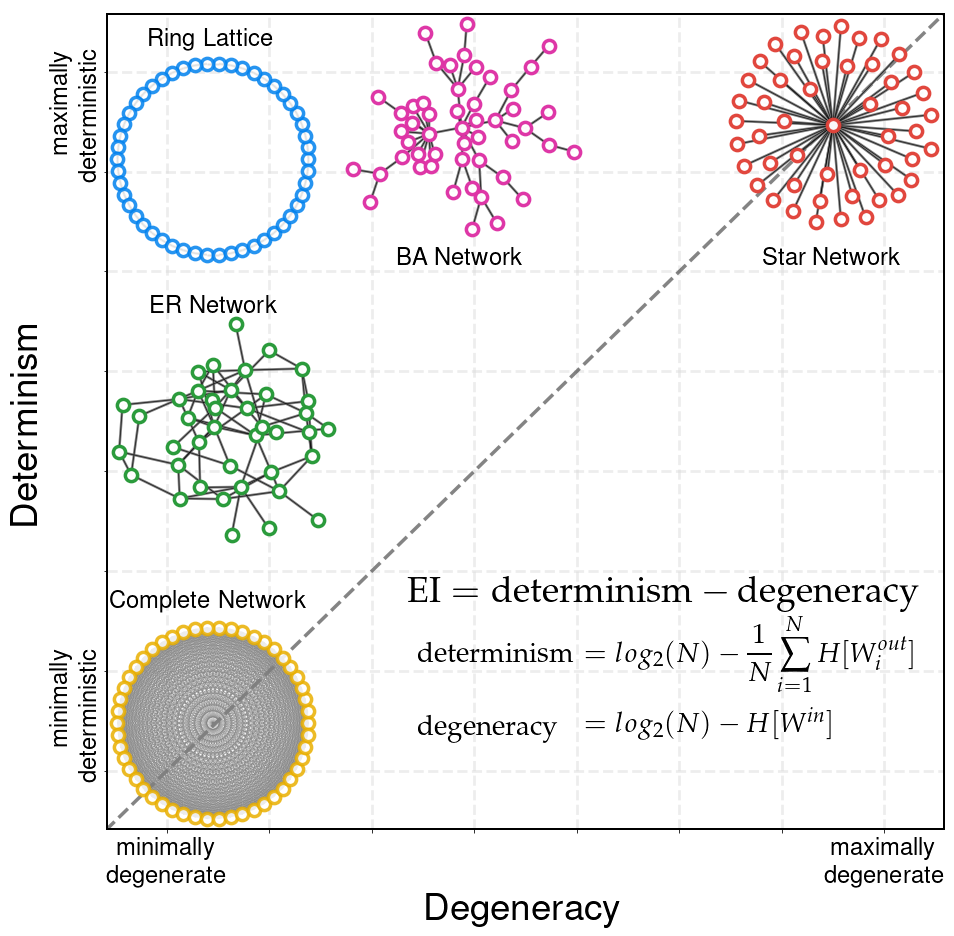

In [30]:
fig, ax = plt.subplots(figsize=(15,15))

plt.plot([-0.5, 10.5], [-0.5, 10.5], marker='', linestyle='--', linewidth=3.5, color='#333333', label='Y=X', alpha=0.6)

ns = 150

plt.axes([0.123, 0.645, 0.20, 0.20])
G10 = nx.watts_strogatz_graph(50, 2, 0.0)
plt.axis('off')
pos10 = nx.circular_layout(G10)
nx.draw_networkx_nodes(G10, pos10, node_color='white', node_size=ns, 
                       linewidths=3.5, alpha=0.85).set_edgecolor('#0081ee')
nx.draw_networkx_edges(G10, pos10, edge_color="grey", width=2.55, alpha=0.98)
nx.draw_networkx_edges(G10, pos10, edge_color="black", width=0.75, alpha=0.8)
ax.text(-.072, 1.085, "Ring Lattice", ha='left', rotation=0, wrap=True, size=24)

plt.axes([0.123, 0.123, 0.20, 0.20])
G11 = nx.complete_graph(50)
plt.axis('off')
pos11 = nx.circular_layout(G11)
nx.draw_networkx_nodes(G11, pos11, node_color='white', node_size=ns, 
                       linewidths=3.5, alpha=0.85).set_edgecolor('#e9af00')
nx.draw_networkx_edges(G11, pos11, edge_color="grey", width=0.25, alpha=0.98)
ax.text(-.130, 0.21, "Complete Network", ha='left', rotation=0, wrap=True, size=24)

plt.axes([0.123, 0.385, 0.22, 0.22])
G12 = nx.erdos_renyi_graph(40, .09)
plt.axis('off')
pos12 = nx.kamada_kawai_layout(G12)
nx.draw_networkx_nodes(G12, pos12, node_color='white', node_size=ns, 
                       linewidths=3.5, alpha=0.99).set_edgecolor('#289a39')
nx.draw_networkx_edges(G12, pos12, edge_color="grey", width=2.55, alpha=0.98)
nx.draw_networkx_edges(G12, pos12, edge_color="black", width=0.75, alpha=0.8)
ax.text(-.069, 0.67, "ER Network", ha='left', rotation=0, wrap=True, size=24)

plt.axes([0.340, 0.668, 0.23, 0.215])
G13 = nx.barabasi_albert_graph(50, 1)
plt.axis('off')
pos13 = nx.kamada_kawai_layout(G13)
nx.draw_networkx_nodes(G13, pos13, node_color='white', node_size=ns, 
                       linewidths=3.5, alpha=0.98).set_edgecolor('#de33a5')
nx.draw_networkx_edges(G13, pos13, edge_color="grey", width=2.55, alpha=0.98)
nx.draw_networkx_edges(G13, pos13, edge_color="black", width=0.75, alpha=0.8)
ax.text(0.305, 0.745, "BA Network", ha='left', rotation=0, wrap=True, size=24)

plt.axes([0.695, 0.675, 0.205, 0.205])
G14 = nx.star_graph(49)
plt.axis('off')
pos14 = nx.spring_layout(G14)
nx.draw_networkx_nodes(G14, pos14, node_color='white', node_size=ns, 
                       linewidths=3.5, alpha=0.98).set_edgecolor('#e1433a')
nx.draw_networkx_edges(G14, pos14, edge_color="grey", width=2.55, alpha=0.98)
nx.draw_networkx_edges(G14, pos14, edge_color="black", width=0.75, alpha=0.8)
ax.text(0.86, 0.745, "Star Network", ha='left', rotation=0, wrap=True, size=24)

font = {'family': 'serif',
        'color':  'k',
        'weight': 'normal',
        'size': 24}

plt.axes([0.1, 0.1, 0.2, 0.2])
plt.axis('off')
plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
string10 = r'$\rm EI = determinism - degeneracy$'
string21 = r'$\rm determinism$'
string22 = r'$= log_2(N) - ' r'\displaystyle\frac{1}{N}\displaystyle\sum_{i=1}^N H[W_i^{out}]$'
string31 = r'$\rm degeneracy$'
string32 = r'$\hspace{0.6cm}= log_2(N) - ' r'H[W^{in}]$'

ax.text(0.320, 0.2200, string10, ha='left', rotation=0, wrap=True, size=36)
ax.text(0.335, 0.1250, string21, ha='left', rotation=0, wrap=True, size=28)
ax.text(0.590, 0.0780, string22, ha='left', rotation=0, wrap=True, size=28)
ax.text(0.335, 0.0110, string31, ha='left', rotation=0, wrap=True, size=28)
ax.text(0.590, 0.0080, string32, ha='left', rotation=0, wrap=True, size=28)

ax.grid(True, linestyle='--', color='gainsboro', linewidth=2.75, alpha=0.5)
ax.set_xlabel("Degeneracy", size=37)
ax.set_ylabel("Determinism", size=37)
ax.set_xticklabels(labels=['','minimally\n degenerate','', '',  '','', '','', 'maximally\n degenerate',''],
                   size=24)
ax.set_xticks(ticks=np.linspace(-0.2,1.2,num=10))
ax.set_yticklabels(labels=['','','minimally\n deterministic','', '', '', '',  '',' maximally\n deterministic'], 
                   size=24, rotation='vertical')
ax.set_yticks(ticks=np.linspace(-0.2,1.2,num=10))
ax.set_xlim(-0.135,1.135)
ax.set_ylim(-0.135,1.135)
plt.rc('axes', linewidth=2)
# plt.savefig("../figs/pngs/EffectiveInformation_DetermDegen.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/EffectiveInformation_DetermDegen.pdf", bbox_inches='tight')

plt.show()

____________________

___________________________

In [7]:
def show_values(pc, ax=ax0, fmt="%.2f", **kw):
    """For bar charts, show the value of the height of the bar."""
    pc.update_scalarmappable()
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        plt.text(x, y, fmt % value, ha="center", va="center", size=26, color=color, **kw)

In [8]:
tpm0 = np.array([[0.0,0.0,0.0,0.5,0.5],
                 [1/3,0.0,1/3,1/3,0.0],
                 [0.0,0.5,0.0,0.5,0.0],
                 [0.0,0.0,0.0,0.0,1.0],
                 [0.5,0.0,0.0,0.5,0.0]])

G = nx.from_numpy_array(tpm0, create_using=nx.DiGraph())
ws = np.array(list(nx.get_edge_attributes(G, 'weight').values()))

In [9]:
plt.rc('axes', linewidth=3)

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


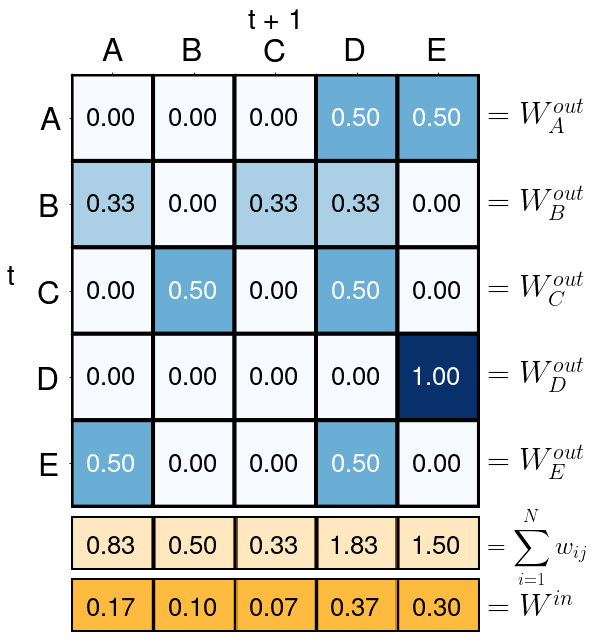

In [29]:
fig = plt.figure(figsize=(7.3, 16))
gs = gridspec.GridSpec(4, 1, height_ratios=[7, 10, 1.2, 1.2]) 

# ax3 = plt.subplot(gs[0])
# pos = nx.circular_layout(G)
# nx.draw_networkx_nodes(G, pos, node_color='aliceblue', node_size=2000, 
#                        linewidths=3.5, alpha=0.99, ax=ax3).set_edgecolor('midnightblue')
# nx.draw_networkx_edges(G, pos, edge_color="#333333", width=4.5, arrowstyle="-|>", 
#                        arrowsize=40, alpha=0.98, ax=ax3)
# nx.draw_networkx_labels(G, pos, labels=dict(zip(np.arange(0, 5, 1), ['A', 'B', 'C', 'D', 'E'])), 
#                         font_size=24, font_color='k', alpha=0.98, font_weight='semibold', ax=ax3)
# ax3.set_axis_off()
# ax3.set_ylim(-2.3, 1.5)
# ax3.set_xlim(-0.8, 0.8)


ax0 = plt.subplot(gs[1])
ax0.set_xticks(np.arange(0, 5, 1))
ax0.set_yticks(np.arange(0, 5, 1))
ax0.set_xticklabels(['A', 'B', 'C', 'D', 'E'], fontsize=32, fontweight='bold')
ax0.set_yticklabels(['A', 'B', 'C', 'D', 'E'], fontsize=32, fontweight='bold')
ax0.set_xticks(np.arange(-.5, 4.5, 1), minor=True)
ax0.set_yticks(np.arange(-.5, 4.5, 1), minor=True)
ax0.tick_params(axis='y', which='major', pad=7)

c = plt.pcolor(np.arange(-.5, 5, 1), np.arange(-.5, 5, 1), tpm0, edgecolors='k', linewidths=4.0, cmap='Blues')
ax0.invert_yaxis()
ax0.xaxis.set_label_position("top")
ax0.xaxis.tick_top()
ax0.set_xlabel('t + 1', size=28, labelpad=8.0)
ax0.set_ylabel('t', size=28, rotation=0, labelpad=27.0)
ax0.xaxis.label.set_position((0.5,5.0))
show_values(c)

ax0.text(4.61, 0.17, '$=W_{A}^{out}$', ha='left', rotation=0, wrap=True, size=32)
ax0.text(4.61, 1.17, '$=W_{B}^{out}$', ha='left', rotation=0, wrap=True, size=32)
ax0.text(4.61, 2.17, '$=W_{C}^{out}$', ha='left', rotation=0, wrap=True, size=32)
ax0.text(4.61, 3.17, '$=W_{D}^{out}$', ha='left', rotation=0, wrap=True, size=32)
ax0.text(4.61, 4.17, '$=W_{E}^{out}$', ha='left', rotation=0, wrap=True, size=32)

ms = 78
ax1 = plt.subplot(gs[2])
ax1.plot([4.00], [0.5], marker='s', markersize=ms, color='orange', alpha=0.25)
ax1.plot([3.00], [0.5], marker='s', markersize=ms, color='orange', alpha=0.25)
ax1.plot([2.00], [0.5], marker='s', markersize=ms, color='orange', alpha=0.25)
ax1.plot([1.00], [0.5], marker='s', markersize=ms, color='orange', alpha=0.25)
ax1.plot([0.00], [0.5], marker='s', markersize=ms, color='orange', alpha=0.25)
ax1.vlines(0.5, -1, 2, linewidth=4.5)
ax1.vlines(1.5, -1, 2, linewidth=4.5)
ax1.vlines(2.5, -1, 2, linewidth=4.5)
ax1.vlines(3.5, -1, 2, linewidth=4.5)
ax1.set_xlim(-0.5,4.5)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_ylim(0,1)
vals = tpm0.sum(axis=0)
ax1.text(-.31, 0.32, "%.2f"%vals[0], ha='left', rotation=0, wrap=True, size=26)
ax1.text(0.69, 0.32, "%.2f"%vals[1], ha='left', rotation=0, wrap=True, size=26)
ax1.text(1.69, 0.32, "%.2f"%vals[2], ha='left', rotation=0, wrap=True, size=26)
ax1.text(2.69, 0.32, "%.2f"%vals[3], ha='left', rotation=0, wrap=True, size=26)
ax1.text(3.69, 0.32, "%.2f"%vals[4], ha='left', rotation=0, wrap=True, size=26)

ax2 = plt.subplot(gs[3])
ax2.plot([4.00], [0.5], marker='s', markersize=ms, color='orange', alpha=0.75)
ax2.plot([3.00], [0.5], marker='s', markersize=ms, color='orange', alpha=0.75)
ax2.plot([2.00], [0.5], marker='s', markersize=ms, color='orange', alpha=0.75)
ax2.plot([1.00], [0.5], marker='s', markersize=ms, color='orange', alpha=0.75)
ax2.plot([0.00], [0.5], marker='s', markersize=ms, color='orange', alpha=0.75)
ax2.vlines(0.5, -1, 2, linewidth=4.5)
ax2.vlines(1.5, -1, 2, linewidth=4.5)
ax2.vlines(2.5, -1, 2, linewidth=4.5)
ax2.vlines(3.5, -1, 2, linewidth=4.5)
ax2.set_xlim(-0.5,4.5)
ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_ylim(0,1)
ax2.text(-.31, 0.32, "%.2f"%(vals[0]/5), ha='left', rotation=0, wrap=True, size=26)
ax2.text(0.69, 0.32, "%.2f"%(vals[1]/5), ha='left', rotation=0, wrap=True, size=26)
ax2.text(1.69, 0.32, "%.2f"%(vals[2]/5), ha='left', rotation=0, wrap=True, size=26)
ax2.text(2.69, 0.32, "%.2f"%(vals[3]/5), ha='left', rotation=0, wrap=True, size=26)
ax2.text(3.69, 0.32, "%.2f"%(vals[4]/5), ha='left', rotation=0, wrap=True, size=26)

plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
string10 = r'$= \displaystyle\sum_{i=1}^N w_{ij}$'
string20 = r'$= W^{in}$'
# string10 = r'$\displaystyle\sum_{i=1}^N w_{ij} =$'
# string20 = r'$W^{in} =$'

ax1.text(4.61, -0.29, string10, ha='left', rotation=0, wrap=True, size=26)
ax2.text(4.61, 0.30,  string20, ha='left', rotation=0, wrap=True, size=32)
# ax1.text(-2.0, -0.3, string10, ha='left', rotation=0, wrap=True, size=28)
# ax2.text(-1.55, 0.295, string20, ha='left', rotation=0, wrap=True, size=29)

plt.subplots_adjust(wspace=0, hspace=0.05)

plt.savefig("../figs/pngs/EffectiveInfoCalculation_Network_TPM11.png", dpi=425, bbox_inches='tight')
plt.savefig("../figs/pdfs/EffectiveInfoCalculation_Network_TPM11.pdf", bbox_inches='tight')
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


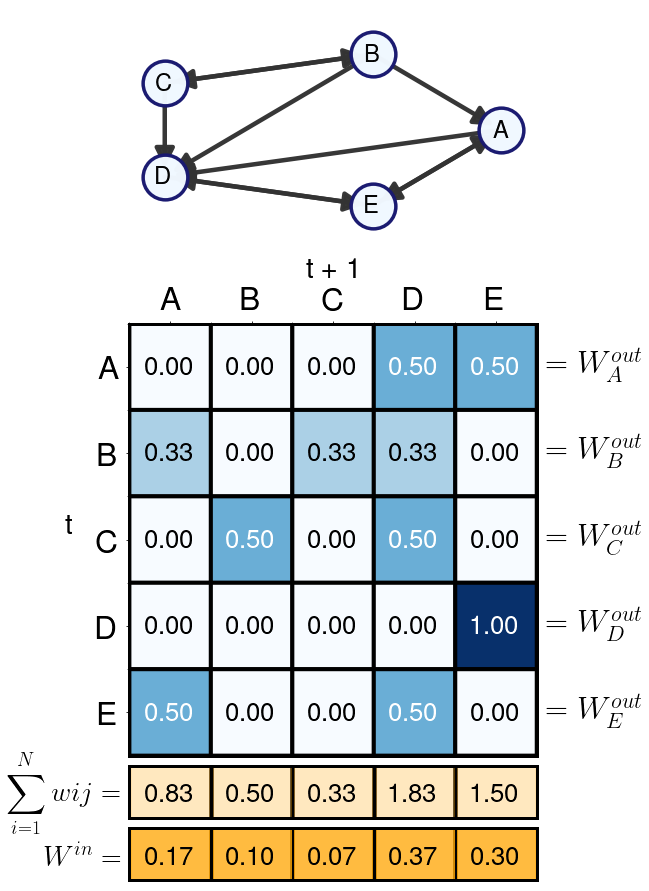

In [99]:
fig = plt.figure(figsize=(7.3, 16))
gs = gridspec.GridSpec(4, 1, height_ratios=[7, 10, 1.2, 1.2]) 

ax3 = plt.subplot(gs[0])
pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='aliceblue', node_size=2000, 
                       linewidths=3.5, alpha=0.99, ax=ax3).set_edgecolor('midnightblue')
nx.draw_networkx_edges(G, pos, edge_color="#333333", width=4.5, arrowstyle="-|>", 
                       arrowsize=40, alpha=0.98, ax=ax3)
nx.draw_networkx_labels(G, pos, labels=dict(zip(np.arange(0, 5, 1), ['A', 'B', 'C', 'D', 'E'])), 
                        font_size=24, font_color='k', alpha=0.98, font_weight='semibold', ax=ax3)
ax3.set_axis_off()
ax3.set_ylim(-2.3, 1.5)
# ax3.set_xlim(-0.8, 0.8)


ax0 = plt.subplot(gs[1])
ax0.set_xticks(np.arange(0, 5, 1))
ax0.set_yticks(np.arange(0, 5, 1))
ax0.set_xticklabels(['A', 'B', 'C', 'D', 'E'], fontsize=32, fontweight='bold')
ax0.set_yticklabels(['A', 'B', 'C', 'D', 'E'], fontsize=32, fontweight='bold')
ax0.set_xticks(np.arange(-.5, 4.5, 1), minor=True)
ax0.set_yticks(np.arange(-.5, 4.5, 1), minor=True)
ax0.tick_params(axis='y', which='major', pad=7)

c = plt.pcolor(np.arange(-.5, 5, 1), np.arange(-.5, 5, 1), tpm0, edgecolors='k', linewidths=4.0, cmap='Blues')
ax0.invert_yaxis()
ax0.xaxis.set_label_position("top")
ax0.xaxis.tick_top()
ax0.set_xlabel('t + 1', size=28, labelpad=8.0)
ax0.set_ylabel('t', size=28, rotation=0, labelpad=27.0)
ax0.xaxis.label.set_position((0.5,5.0))
show_values(c)

ax0.text(4.61, 0.17, '$=W_{A}^{out}$', ha='left', rotation=0, wrap=True, size=32)
ax0.text(4.61, 1.17, '$=W_{B}^{out}$', ha='left', rotation=0, wrap=True, size=32)
ax0.text(4.61, 2.17, '$=W_{C}^{out}$', ha='left', rotation=0, wrap=True, size=32)
ax0.text(4.61, 3.17, '$=W_{D}^{out}$', ha='left', rotation=0, wrap=True, size=32)
ax0.text(4.61, 4.17, '$=W_{E}^{out}$', ha='left', rotation=0, wrap=True, size=32)

ms = 78
ax1 = plt.subplot(gs[2])
ax1.plot([4.00], [0.5], marker='s', markersize=ms, color='orange', alpha=0.25)
ax1.plot([3.00], [0.5], marker='s', markersize=ms, color='orange', alpha=0.25)
ax1.plot([2.00], [0.5], marker='s', markersize=ms, color='orange', alpha=0.25)
ax1.plot([1.00], [0.5], marker='s', markersize=ms, color='orange', alpha=0.25)
ax1.plot([0.00], [0.5], marker='s', markersize=ms, color='orange', alpha=0.25)
ax1.vlines(0.5, -1, 2, linewidth=4.5)
ax1.vlines(1.5, -1, 2, linewidth=4.5)
ax1.vlines(2.5, -1, 2, linewidth=4.5)
ax1.vlines(3.5, -1, 2, linewidth=4.5)
ax1.set_xlim(-0.5,4.5)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_ylim(0,1)
vals = tpm0.sum(axis=0)
ax1.text(-.31, 0.32, "%.2f"%vals[0], ha='left', rotation=0, wrap=True, size=26)
ax1.text(0.69, 0.32, "%.2f"%vals[1], ha='left', rotation=0, wrap=True, size=26)
ax1.text(1.69, 0.32, "%.2f"%vals[2], ha='left', rotation=0, wrap=True, size=26)
ax1.text(2.69, 0.32, "%.2f"%vals[3], ha='left', rotation=0, wrap=True, size=26)
ax1.text(3.69, 0.32, "%.2f"%vals[4], ha='left', rotation=0, wrap=True, size=26)

ax2 = plt.subplot(gs[3])
ax2.plot([4.00], [0.5], marker='s', markersize=ms, color='orange', alpha=0.75)
ax2.plot([3.00], [0.5], marker='s', markersize=ms, color='orange', alpha=0.75)
ax2.plot([2.00], [0.5], marker='s', markersize=ms, color='orange', alpha=0.75)
ax2.plot([1.00], [0.5], marker='s', markersize=ms, color='orange', alpha=0.75)
ax2.plot([0.00], [0.5], marker='s', markersize=ms, color='orange', alpha=0.75)
ax2.vlines(0.5, -1, 2, linewidth=4.5)
ax2.vlines(1.5, -1, 2, linewidth=4.5)
ax2.vlines(2.5, -1, 2, linewidth=4.5)
ax2.vlines(3.5, -1, 2, linewidth=4.5)
ax2.set_xlim(-0.5,4.5)
ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_ylim(0,1)
ax2.text(-.31, 0.32, "%.2f"%(vals[0]/5), ha='left', rotation=0, wrap=True, size=26)
ax2.text(0.69, 0.32, "%.2f"%(vals[1]/5), ha='left', rotation=0, wrap=True, size=26)
ax2.text(1.69, 0.32, "%.2f"%(vals[2]/5), ha='left', rotation=0, wrap=True, size=26)
ax2.text(2.69, 0.32, "%.2f"%(vals[3]/5), ha='left', rotation=0, wrap=True, size=26)
ax2.text(3.69, 0.32, "%.2f"%(vals[4]/5), ha='left', rotation=0, wrap=True, size=26)

plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
string10 = r'$\displaystyle\sum_{i=1}^N w{ij} =$'
string20 = r'$W^{in} =$'

ax1.text(-2.0, -0.3, string10, ha='left', rotation=0, wrap=True, size=28)
ax2.text(-1.55, 0.295, string20, ha='left', rotation=0, wrap=True, size=29)

plt.subplots_adjust(wspace=0, hspace=0.05)

# plt.savefig("../figs/pngs/EffectiveInfoCalculation_Network_TPM.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/EffectiveInfoCalculation_Network_TPM.pdf", bbox_inches='tight')
plt.show()

_______________________

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


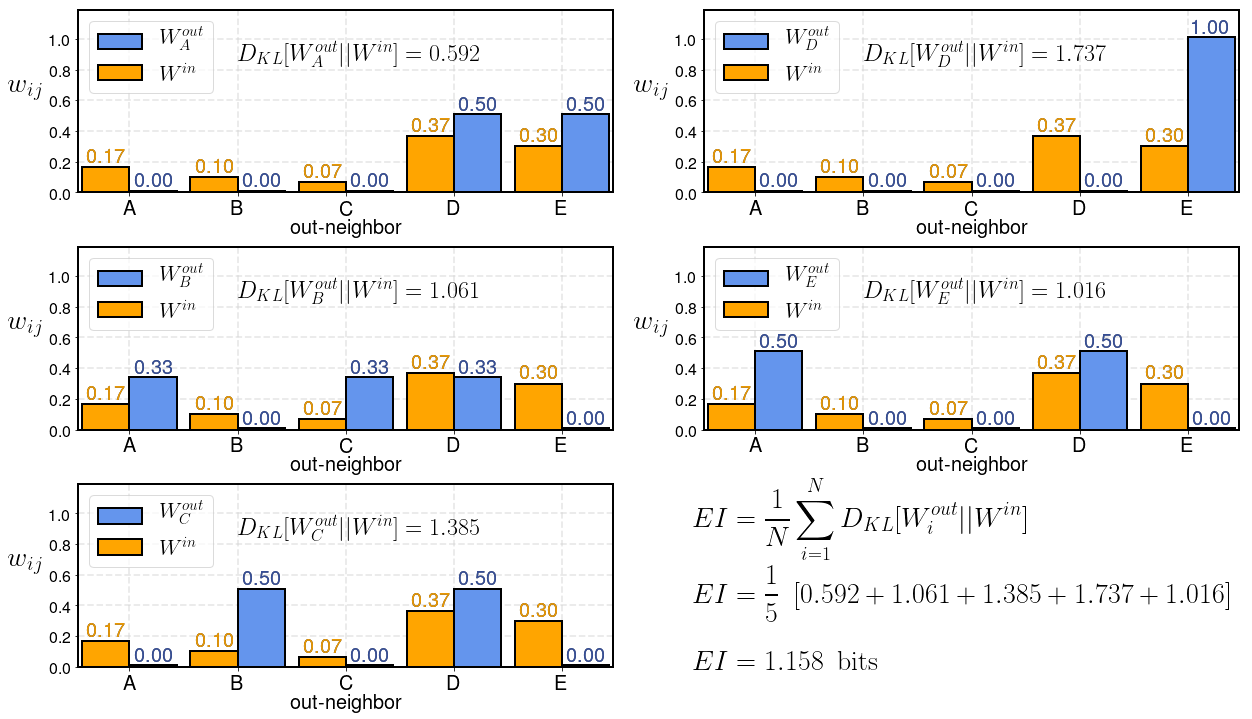

In [89]:
plt.rc('axes', linewidth=2)
fig, ((ax00, ax01), (ax02, ax03), (ax04, ax05)) = plt.subplots(3, 2, figsize=(16*1.3,9*1.3))

outcol = 'cornflowerblue'
ax00.bar(np.linspace(0.0, 5.5, 5), tpm0[0]+0.01, color=outcol, linewidth=2.0, edgecolor='k',
         width=0.6, label=r'$W_{A}^{out}$')
x_wij = np.linspace(0.0, 5.5, 5)
y_wij = tpm0[0]
for i in range(len(x_wij)):
    ax00.text(x_wij[i], y_wij[i]+0.040, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='#262626')
    ax00.text(x_wij[i], y_wij[i]+0.040, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='royalblue', alpha=0.6)
    
ax00.set_xticklabels(["A", "B", "C", "D", "E"])
ax00.bar(np.linspace(-.6, 4.9, 5), vals/5, color='orange', linewidth=2.0, edgecolor='k',
         width=0.6, label=r'$W^{in}$')

x_wij = np.linspace(-.6, 4.9, 5)
y_wij = vals/5
for i in range(len(x_wij)):
    ax00.text(x_wij[i], y_wij[i]+0.035, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='#262626')
    ax00.text(x_wij[i], y_wij[i]+0.035, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='orange', alpha=0.9)

ax00.set_ylim(0.0,1.19)
ax00.set_xlim(-0.95,5.85)
ax00.set_xticks(np.linspace(-.3, 5.2, 5))
ax00.set_yticks(np.linspace(0, 1, 6))
ax00.set_yticklabels(np.round(np.linspace(0, 1, 6), 2), size=16)
ax00.set_xticklabels(["A", "B", "C", "D", "E"], size=20, fontweight='semibold')
ax00.set_ylabel(r'$w_{ij}$', fontsize=28, rotation='horizontal', labelpad=25)
ax00.set_xlabel('out-neighbor', fontsize=20, labelpad=0)
ax00.set_axisbelow(True)
ax00.grid(which='major', linestyle='--', color='lightgrey', linewidth=1.75, alpha=0.5)
ax00.legend(loc=2, fontsize=22, framealpha=0.7)
strax1 = r'$D_{KL}[W^{out}_{A}||W^{in}] = %.3f $'%get_ei_i(tpm0, p0=0)[0]
ax00.text(2.62, 0.825, strax1, ha='center', fontsize=24, color='k')

ax02.bar(np.linspace(0.0, 5.5, 5), tpm0[1]+0.01, color=outcol, linewidth=2.0, edgecolor='k',
         width=0.6, label=r'$W_{B}^{out}$')
x_wij = np.linspace(0.0, 5.5, 5)
y_wij = tpm0[1]
for i in range(len(x_wij)):
    ax02.text(x_wij[i], y_wij[i]+0.040, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='#262626')
    ax02.text(x_wij[i], y_wij[i]+0.040, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='royalblue', alpha=0.6)

ax02.set_xticklabels(["A", "B", "C", "D", "E"])
ax02.bar(np.linspace(-.6, 4.9, 5), vals/5, color='orange', linewidth=2.0, edgecolor='k',
         width=0.6, label=r'$W^{in}$')
x_wij = np.linspace(-.6, 4.9, 5)
y_wij = vals/5
for i in range(len(x_wij)):
    ax02.text(x_wij[i], y_wij[i]+0.035, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='#262626')
    ax02.text(x_wij[i], y_wij[i]+0.035, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='orange', alpha=0.9)

ax02.set_ylim(0.0,1.19)
ax02.set_xlim(-0.95,5.85)
ax02.set_xticks(np.linspace(-.3, 5.2, 5))
ax02.set_yticks(np.linspace(0, 1, 6))
ax02.set_yticklabels(np.round(np.linspace(0, 1, 6), 2), size=16)
ax02.set_xticklabels(["A", "B", "C", "D", "E"], size=20, fontweight='semibold')
ax02.set_ylabel(r'$w_{ij}$', fontsize=28, rotation='horizontal', labelpad=25)
ax02.set_xlabel('out-neighbor', fontsize=20, labelpad=0)
ax02.set_axisbelow(True)
ax02.grid(which='major', linestyle='--', color='lightgrey', linewidth=1.75, alpha=0.5)
ax02.legend(loc=2, fontsize=22, framealpha=0.7)
strax1 = r'$D_{KL}[W^{out}_{B}||W^{in}] = %.3f $'%get_ei_i(tpm0, p0=0)[1]
ax02.text(2.62, 0.825, strax1, ha='center', fontsize=24, color='k')

ax04.bar(np.linspace(0.0, 5.5, 5), tpm0[2]+0.01, color=outcol, linewidth=2.0, edgecolor='k',
         width=0.6, label=r'$W_{C}^{out}$')
x_wij = np.linspace(0.0, 5.5, 5)
y_wij = tpm0[2]
for i in range(len(x_wij)):
    ax04.text(x_wij[i], y_wij[i]+0.040, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='#262626')
    ax04.text(x_wij[i], y_wij[i]+0.040, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='royalblue', alpha=0.6)

ax04.set_xticklabels(["A", "B", "C", "D", "E"])
ax04.bar(np.linspace(-.6, 4.9, 5), vals/5, color='orange', linewidth=2.0, edgecolor='k',
         width=0.6, label=r'$W^{in}$')

x_wij = np.linspace(-.6, 4.9, 5)
y_wij = vals/5
for i in range(len(x_wij)):
    ax04.text(x_wij[i], y_wij[i]+0.035, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='#262626')
    ax04.text(x_wij[i], y_wij[i]+0.035, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='orange', alpha=0.9)

ax04.set_ylim(0.0,1.19)
ax04.set_xlim(-0.95,5.85)
ax04.set_xticks(np.linspace(-.3, 5.2, 5))
ax04.set_yticks(np.linspace(0, 1, 6))
ax04.set_yticklabels(np.round(np.linspace(0, 1, 6), 2), size=16)
ax04.set_xticklabels(["A", "B", "C", "D", "E"], size=20, fontweight='semibold')
ax04.set_ylabel(r'$w_{ij}$', fontsize=28, rotation='horizontal', labelpad=25)
ax04.set_xlabel('out-neighbor', fontsize=20, labelpad=0)
ax04.set_axisbelow(True)
ax04.grid(which='major', linestyle='--', color='lightgrey', linewidth=1.75, alpha=0.5)
ax04.legend(loc=2, fontsize=22, framealpha=0.7)
strax1 = r'$D_{KL}[W^{out}_{C}||W^{in}] = %.3f $'%get_ei_i(tpm0, p0=0)[2]
ax04.text(2.62, 0.825, strax1, ha='center', fontsize=24, color='k')


ax01.bar(np.linspace(0.0, 5.5, 5), tpm0[3]+0.01, color=outcol, linewidth=2.0, edgecolor='k',
         width=0.6, label=r'$W_{D}^{out}$')
x_wij = np.linspace(0.0, 5.5, 5)
y_wij = tpm0[3]
for i in range(len(x_wij)):
    ax01.text(x_wij[i], y_wij[i]+0.040, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='#262626')
    ax01.text(x_wij[i], y_wij[i]+0.040, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='royalblue', alpha=0.6)

ax01.set_xticklabels(["A", "B", "C", "D", "E"])
ax01.bar(np.linspace(-.6, 4.9, 5), vals/5, color='orange', linewidth=2.0, edgecolor='k',
     width=0.6, label=r'$W^{in}$')

x_wij = np.linspace(-.6, 4.9, 5)
y_wij = vals/5
for i in range(len(x_wij)):
    ax01.text(x_wij[i], y_wij[i]+0.035, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='#262626')
    ax01.text(x_wij[i], y_wij[i]+0.035, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='orange', alpha=0.9)

ax01.set_ylim(0.0,1.19)
ax01.set_xlim(-0.95,5.85)
ax01.set_xticks(np.linspace(-.3, 5.2, 5))
ax01.set_yticks(np.linspace(0, 1, 6))
ax01.set_yticklabels(np.round(np.linspace(0, 1, 6), 2), size=16)
ax01.set_xticklabels(["A", "B", "C", "D", "E"], size=20, fontweight='semibold')
ax01.set_ylabel(r'$w_{ij}$', fontsize=28, rotation='horizontal', labelpad=25)
ax01.set_xlabel('out-neighbor', fontsize=20, labelpad=0)
ax01.set_axisbelow(True)
ax01.grid(which='major', linestyle='--', color='lightgrey', linewidth=1.75, alpha=0.5)
ax01.legend(loc=2, fontsize=22, framealpha=0.7)
strax1 = r'$D_{KL}[W^{out}_{D}||W^{in}] = %.3f $'%get_ei_i(tpm0, p0=0)[3]
ax01.text(2.62, 0.825, strax1, ha='center', fontsize=24, color='k')

ax03.bar(np.linspace(0.0, 5.5, 5), tpm0[4]+0.01, color=outcol, linewidth=2.0, edgecolor='k',
         width=0.6, label=r'$W_{E}^{out}$')
x_wij = np.linspace(0.0, 5.5, 5)
y_wij = tpm0[4]
for i in range(len(x_wij)):
    ax03.text(x_wij[i], y_wij[i]+0.040, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='#262626')
    ax03.text(x_wij[i], y_wij[i]+0.040, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='royalblue', alpha=0.6)

ax03.set_xticklabels(["A", "B", "C", "D", "E"])
ax03.bar(np.linspace(-.6, 4.9, 5), vals/5, color='orange', linewidth=2.0, edgecolor='k',
     width=0.6, label=r'$W^{in}$')

x_wij = np.linspace(-.6, 4.9, 5)
y_wij = vals/5
for i in range(len(x_wij)):
    ax03.text(x_wij[i], y_wij[i]+0.035, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='#262626')
    ax03.text(x_wij[i], y_wij[i]+0.035, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='orange', alpha=0.9)

ax03.set_ylim(0.0,1.19)
ax03.set_xlim(-0.95,5.85)
ax03.set_xticks(np.linspace(-.3, 5.2, 5))
ax03.set_yticks(np.linspace(0, 1, 6))
ax03.set_yticklabels(np.round(np.linspace(0, 1, 6), 2), size=16)
ax03.set_xticklabels(["A", "B", "C", "D", "E"], size=20, fontweight='semibold')
ax03.set_ylabel(r'$w_{ij}$', fontsize=28, rotation='horizontal', labelpad=25)
ax03.set_xlabel('out-neighbor', fontsize=20, labelpad=0)
ax03.set_axisbelow(True)
ax03.grid(which='major', linestyle='--', color='lightgrey', linewidth=1.75, alpha=0.5)
ax03.legend(loc=2,fontsize=22, framealpha=0.7)
strax1 = r'$D_{KL}[W^{out}_{E}||W^{in}] = %.3f $'%get_ei_i(tpm0, p0=0)[4]
ax03.text(2.62, 0.825, strax1, ha='center', fontsize=24, color='k')

string1 = r'$EI = \displaystyle\frac{1}{N} \displaystyle\sum_{i=1}^N D_{KL}[W_{i}^{out}|| W^{in}]$'
string2 = r'$EI = \displaystyle\frac{1}{5} \hspace{0.5cm} [0.592 + 1.061 + 1.385 + 1.737 + 1.016]$'
string3 = r'$EI = 1.158 \hspace{0.5cm}$' r'$\rm bits$'
ax05.text(-.02, 0.590, string1, ha='left', rotation=0, wrap=False, size=28)
ax05.text(-.02, 0.250, string2, ha='left', rotation=0, wrap=False, size=28)
ax05.text(-.02, -0.01, string3, ha='left', rotation=0, wrap=False, size=28)

ax05.axis('off')

plt.subplots_adjust(left=None, bottom=0.1, right=None, top=None, wspace=0.17, hspace=0.3)

# plt.savefig("../figs/pngs/EffectiveInfoCalculation_KLD.png", dpi=425, bbox_inches='tight')
# plt.savefig("../figs/pdfs/EffectiveInfoCalculation_KLD.pdf", dpi=425, bbox_inches='tight')

plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


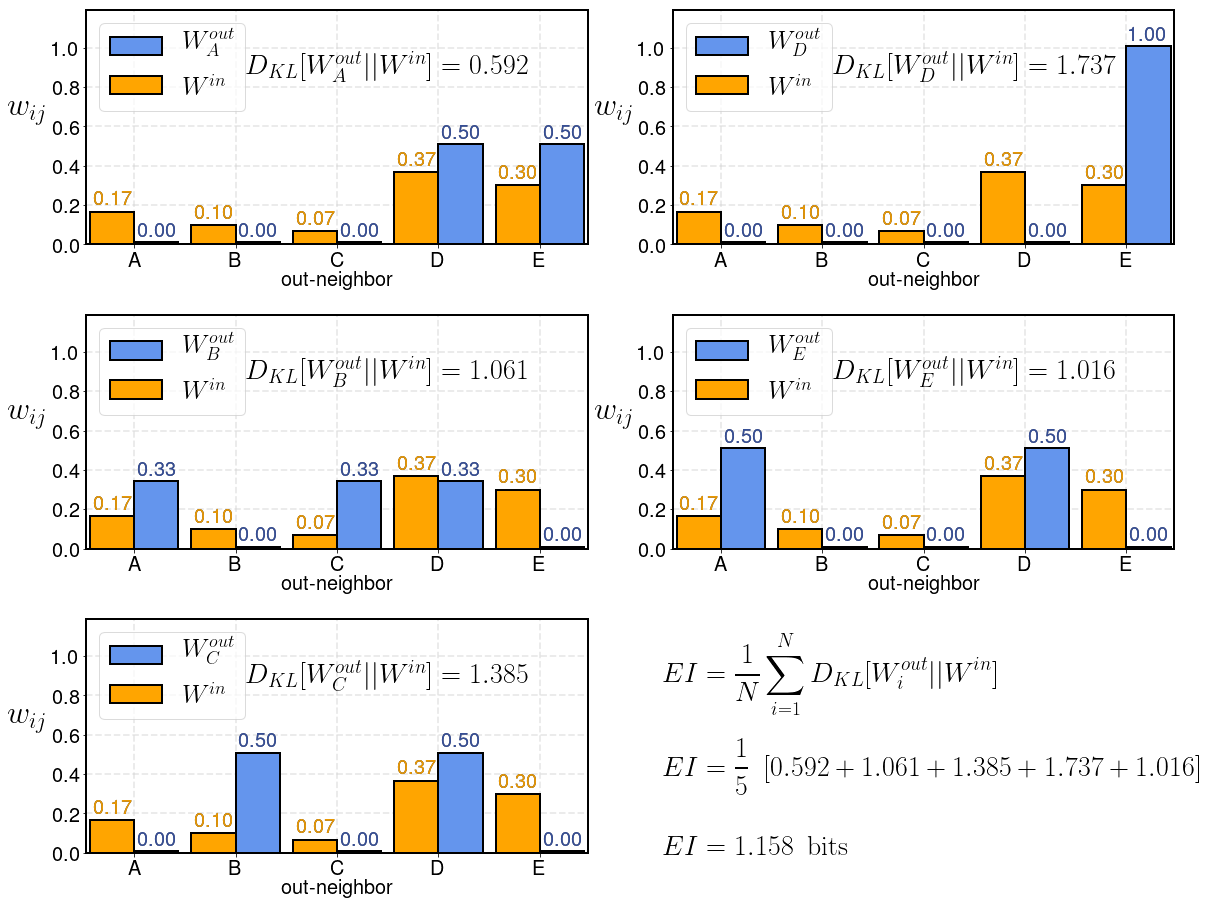

In [19]:
plt.rc('axes', linewidth=2)
fig, ((ax00, ax01), (ax02, ax03), (ax04, ax05)) = plt.subplots(3, 2, figsize=(13*1.5,10*1.5))

outcol = 'cornflowerblue'
ax00.bar(np.linspace(0.0, 5.5, 5), tpm0[0]+0.01, color=outcol, linewidth=2.0, edgecolor='k',
         width=0.6, label=r'$W_{A}^{out}$')
x_wij = np.linspace(0.0, 5.5, 5)
y_wij = tpm0[0]
for i in range(len(x_wij)):
    ax00.text(x_wij[i], y_wij[i]+0.040, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='#262626')
    ax00.text(x_wij[i], y_wij[i]+0.040, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='royalblue', alpha=0.6)
    
ax00.set_xticklabels(["A", "B", "C", "D", "E"])
ax00.bar(np.linspace(-.6, 4.9, 5), vals/5, color='orange', linewidth=2.0, edgecolor='k',
         width=0.6, label=r'$W^{in}$')

x_wij = np.linspace(-.6, 4.9, 5)
y_wij = vals/5
for i in range(len(x_wij)):
    ax00.text(x_wij[i], y_wij[i]+0.035, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='#262626')
    ax00.text(x_wij[i], y_wij[i]+0.035, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='orange', alpha=0.9)

ax00.set_ylim(0.0,1.19)
ax00.set_xlim(-0.95,5.85)
ax00.set_xticks(np.linspace(-.3, 5.2, 5))
ax00.set_yticks(np.linspace(0, 1, 6))
ax00.set_yticklabels(np.round(np.linspace(0, 1, 6), 2), size=20)
ax00.set_xticklabels(["A", "B", "C", "D", "E"], size=20, fontweight='semibold')
ax00.set_ylabel(r'$w_{ij}$', fontsize=32, rotation='horizontal', labelpad=25)
ax00.set_xlabel('out-neighbor', fontsize=20, labelpad=0)
ax00.set_axisbelow(True)
ax00.grid(which='major', linestyle='--', color='lightgrey', linewidth=1.75, alpha=0.5)
ax00.legend(loc=2, fontsize=26, framealpha=0.7)
strax1 = r'$D_{KL}[W^{out}_{A}||W^{in}] = %.3f $'%get_ei_i(tpm0, p0=0)[0]
ax00.text(1.22, 0.825, strax1, ha='left', fontsize=28, color='k')

ax02.bar(np.linspace(0.0, 5.5, 5), tpm0[1]+0.01, color=outcol, linewidth=2.0, edgecolor='k',
         width=0.6, label=r'$W_{B}^{out}$')
x_wij = np.linspace(0.0, 5.5, 5)
y_wij = tpm0[1]
for i in range(len(x_wij)):
    ax02.text(x_wij[i], y_wij[i]+0.040, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='#262626')
    ax02.text(x_wij[i], y_wij[i]+0.040, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='royalblue', alpha=0.6)

ax02.set_xticklabels(["A", "B", "C", "D", "E"])
ax02.bar(np.linspace(-.6, 4.9, 5), vals/5, color='orange', linewidth=2.0, edgecolor='k',
         width=0.6, label=r'$W^{in}$')
x_wij = np.linspace(-.6, 4.9, 5)
y_wij = vals/5
for i in range(len(x_wij)):
    ax02.text(x_wij[i], y_wij[i]+0.035, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='#262626')
    ax02.text(x_wij[i], y_wij[i]+0.035, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='orange', alpha=0.9)

ax02.set_ylim(0.0,1.19)
ax02.set_xlim(-0.95,5.85)
ax02.set_xticks(np.linspace(-.3, 5.2, 5))
ax02.set_yticks(np.linspace(0, 1, 6))
ax02.set_yticklabels(np.round(np.linspace(0, 1, 6), 2), size=20)
ax02.set_xticklabels(["A", "B", "C", "D", "E"], size=20, fontweight='semibold')
ax02.set_ylabel(r'$w_{ij}$', fontsize=32, rotation='horizontal', labelpad=25)
ax02.set_xlabel('out-neighbor', fontsize=20, labelpad=0)
ax02.set_axisbelow(True)
ax02.grid(which='major', linestyle='--', color='lightgrey', linewidth=1.75, alpha=0.5)
ax02.legend(loc=2, fontsize=26, framealpha=0.7)
strax1 = r'$D_{KL}[W^{out}_{B}||W^{in}] = %.3f $'%get_ei_i(tpm0, p0=0)[1]
ax02.text(1.22, 0.825, strax1, ha='left', fontsize=28, color='k')

ax04.bar(np.linspace(0.0, 5.5, 5), tpm0[2]+0.01, color=outcol, linewidth=2.0, edgecolor='k',
         width=0.6, label=r'$W_{C}^{out}$')
x_wij = np.linspace(0.0, 5.5, 5)
y_wij = tpm0[2]
for i in range(len(x_wij)):
    ax04.text(x_wij[i], y_wij[i]+0.040, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='#262626')
    ax04.text(x_wij[i], y_wij[i]+0.040, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='royalblue', alpha=0.6)

ax04.set_xticklabels(["A", "B", "C", "D", "E"])
ax04.bar(np.linspace(-.6, 4.9, 5), vals/5, color='orange', linewidth=2.0, edgecolor='k',
         width=0.6, label=r'$W^{in}$')

x_wij = np.linspace(-.6, 4.9, 5)
y_wij = vals/5
for i in range(len(x_wij)):
    ax04.text(x_wij[i], y_wij[i]+0.035, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='#262626')
    ax04.text(x_wij[i], y_wij[i]+0.035, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='orange', alpha=0.9)

ax04.set_ylim(0.0,1.19)
ax04.set_xlim(-0.95,5.85)
ax04.set_xticks(np.linspace(-.3, 5.2, 5))
ax04.set_yticks(np.linspace(0, 1, 6))
ax04.set_yticklabels(np.round(np.linspace(0, 1, 6), 2), size=20)
ax04.set_xticklabels(["A", "B", "C", "D", "E"], size=20, fontweight='semibold')
ax04.set_ylabel(r'$w_{ij}$', fontsize=32, rotation='horizontal', labelpad=25)
ax04.set_xlabel('out-neighbor', fontsize=20, labelpad=0)
ax04.set_axisbelow(True)
ax04.grid(which='major', linestyle='--', color='lightgrey', linewidth=1.75, alpha=0.5)
ax04.legend(loc=2, fontsize=26, framealpha=0.7)
strax1 = r'$D_{KL}[W^{out}_{C}||W^{in}] = %.3f $'%get_ei_i(tpm0, p0=0)[2]
ax04.text(1.22, 0.825, strax1, ha='left', fontsize=28, color='k')


ax01.bar(np.linspace(0.0, 5.5, 5), tpm0[3]+0.01, color=outcol, linewidth=2.0, edgecolor='k',
         width=0.6, label=r'$W_{D}^{out}$')
x_wij = np.linspace(0.0, 5.5, 5)
y_wij = tpm0[3]
for i in range(len(x_wij)):
    ax01.text(x_wij[i], y_wij[i]+0.040, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='#262626')
    ax01.text(x_wij[i], y_wij[i]+0.040, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='royalblue', alpha=0.6)

ax01.set_xticklabels(["A", "B", "C", "D", "E"])
ax01.bar(np.linspace(-.6, 4.9, 5), vals/5, color='orange', linewidth=2.0, edgecolor='k',
     width=0.6, label=r'$W^{in}$')

x_wij = np.linspace(-.6, 4.9, 5)
y_wij = vals/5
for i in range(len(x_wij)):
    ax01.text(x_wij[i], y_wij[i]+0.035, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='#262626')
    ax01.text(x_wij[i], y_wij[i]+0.035, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='orange', alpha=0.9)

ax01.set_ylim(0.0,1.19)
ax01.set_xlim(-0.95,5.85)
ax01.set_xticks(np.linspace(-.3, 5.2, 5))
ax01.set_yticks(np.linspace(0, 1, 6))
ax01.set_yticklabels(np.round(np.linspace(0, 1, 6), 2), size=20)
ax01.set_xticklabels(["A", "B", "C", "D", "E"], size=20, fontweight='semibold')
ax01.set_ylabel(r'$w_{ij}$', fontsize=32, rotation='horizontal', labelpad=25)
ax01.set_xlabel('out-neighbor', fontsize=20, labelpad=0)
ax01.set_axisbelow(True)
ax01.grid(which='major', linestyle='--', color='lightgrey', linewidth=1.75, alpha=0.5)
ax01.legend(loc=2, fontsize=26, framealpha=0.7)
strax1 = r'$D_{KL}[W^{out}_{D}||W^{in}] = %.3f $'%get_ei_i(tpm0, p0=0)[3]
ax01.text(1.22, 0.825, strax1, ha='left', fontsize=28, color='k')

ax03.bar(np.linspace(0.0, 5.5, 5), tpm0[4]+0.01, color=outcol, linewidth=2.0, edgecolor='k',
         width=0.6, label=r'$W_{E}^{out}$')
x_wij = np.linspace(0.0, 5.5, 5)
y_wij = tpm0[4]
for i in range(len(x_wij)):
    ax03.text(x_wij[i], y_wij[i]+0.040, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='#262626')
    ax03.text(x_wij[i], y_wij[i]+0.040, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='royalblue', alpha=0.6)

ax03.set_xticklabels(["A", "B", "C", "D", "E"])
ax03.bar(np.linspace(-.6, 4.9, 5), vals/5, color='orange', linewidth=2.0, edgecolor='k',
     width=0.6, label=r'$W^{in}$')

x_wij = np.linspace(-.6, 4.9, 5)
y_wij = vals/5
for i in range(len(x_wij)):
    ax03.text(x_wij[i], y_wij[i]+0.035, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='#262626')
    ax03.text(x_wij[i], y_wij[i]+0.035, "%.2f"%y_wij[i], ha='center', #fontweight='semibold',
              fontsize=20, color='orange', alpha=0.9)

ax03.set_ylim(0.0,1.19)
ax03.set_xlim(-0.95,5.85)
ax03.set_xticks(np.linspace(-.3, 5.2, 5))
ax03.set_yticks(np.linspace(0, 1, 6))
ax03.set_yticklabels(np.round(np.linspace(0, 1, 6), 2), size=20)
ax03.set_xticklabels(["A", "B", "C", "D", "E"], size=20, fontweight='semibold')
ax03.set_ylabel(r'$w_{ij}$', fontsize=32, rotation='horizontal', labelpad=25)
ax03.set_xlabel('out-neighbor', fontsize=20, labelpad=0)
ax03.set_axisbelow(True)
ax03.grid(which='major', linestyle='--', color='lightgrey', linewidth=1.75, alpha=0.5)
ax03.legend(loc=2,fontsize=26, framealpha=0.7)
strax1 = r'$D_{KL}[W^{out}_{E}||W^{in}] = %.3f $'%get_ei_i(tpm0, p0=0)[4]
ax03.text(1.22, 0.825, strax1, ha='left', fontsize=28, color='k')

string1 = r'$EI = \displaystyle\frac{1}{N} \displaystyle\sum_{i=1}^N D_{KL}[W_{i}^{out}|| W^{in}]$'
string2 = r'$EI = \displaystyle\frac{1}{5} \hspace{0.5cm} [0.592 + 1.061 + 1.385 + 1.737 + 1.016]$'
string3 = r'$EI = 1.158 \hspace{0.5cm}$' r'$\rm bits$'
ax05.text(-.02, 0.590, string1, ha='left', rotation=0, wrap=False, size=28)
ax05.text(-.02, 0.250, string2, ha='left', rotation=0, wrap=False, size=28)
ax05.text(-.02, -0.01, string3, ha='left', rotation=0, wrap=False, size=28)

ax05.axis('off')

plt.subplots_adjust(left=None, bottom=0.1, right=None, top=None, wspace=0.17, hspace=0.3)

plt.savefig("../figs/pngs/EffectiveInfoCalculation_KLD22.png", dpi=425, bbox_inches='tight')
plt.savefig("../figs/pdfs/EffectiveInfoCalculation_KLD22.pdf", dpi=425, bbox_inches='tight')

plt.show()

# Chapter 04: Causal Emergence

In [3]:
p0=0

In [4]:
def plot_degree(degree, number_of_bins=50, log_binning=False, base=2):
    """Plot the degree distribution with (log) binning."""
    lower_bound = min(degree)
    upper_bound = max(degree)
    
    if log_binning:
        log = np.log2 if base == 2 else np.log10
        lower_bound = log(lower_bound) if lower_bound >= 1 else 0.0
        upper_bound = log(upper_bound)
        bins = np.logspace(lower_bound,upper_bound,number_of_bins, base=base)
    else:
        bins = np.linspace(lower_bound,upper_bound,number_of_bins)
    
    y, __ = np.histogram(degree, bins=bins, density=True)
    x = bins[1:] - np.diff(bins)/2.0
        
    return x,y

In [5]:
def do_net(G, source, target, n_sim=10000, p0=np.exp(-16)):
    """Intervene"""
    if type(G)==np.ndarray:
        G = nx.from_numpy_matrix(G, create_using=nx.DiGraph())
    elif type(G)==nx.classes.graph.Graph:
        G = nx.DiGraph(G)
    
    fpt_list = {}
    Wout = get_Wout_full(G, p0)
    Win = get_Win(G, p0)
    next_node = source
    
    for i in range(n_sim):
        next_node = source
        lisss = [source]
        while next_node != target:
            next_node = np.nonzero(np.random.multinomial(1, np.round(Wout[next_node],2)))[0][0]
            lisss.append(next_node)
        fpt_list[i] = len(lisss)
        
    return list(fpt_list.values())

In [6]:
G = nx.barabasi_albert_graph(10,3)
macro_mapping = dict(zip(G.nodes(), G.nodes()))

Wout = get_Wout_full(G, p0=0)

n_macros = 2
macro_mapping[7] = G.number_of_nodes()
macro_mapping[8] = G.number_of_nodes()
macro_mapping[5] = G.number_of_nodes()+1
macro_mapping[6] = G.number_of_nodes()+1

In [7]:
# October 26th
def get_macro(G, macro_mapping, p0=0):
    """
    Given an input graph and a micro-to-macro mapping, output a macro transition matrix.
    - param G: current micro graph
    - param macro_mapping: a dictionary with {micro_node:macro_node}
    - param p0: smallest probability
    
    - output: Macro, a macro-level transition-probability matrix
    """
    # might have to assert node_labels to be integers
    G = prepare_network(G,p0=p0)
    micro_network_size = G.number_of_nodes()
    micro_Wout = get_Wout_full(G, p0)
    micro_nodes = np.unique(list(macro_mapping.keys()))
    nodes_in_macro_network = np.unique(list(macro_mapping.values()))

    macro_network_size = len(nodes_in_macro_network)
    macro_nodes = nodes_in_macro_network[nodes_in_macro_network > micro_network_size-1]
    n_macro = len(macro_nodes)
    
    if n_macro==0:
        return micro_Wout
    
    micro_to_macro_list = []
    for macro_i in range(n_macro):
        micro_in_macro_i = [k for k,v in macro_mapping.items() if v==macro_nodes[macro_i]]
        micro_to_macro_list.append(micro_in_macro_i)
    
    # get new rows
    macro_row_list = []
    for macro_i in micro_to_macro_list:
        macro_row_list.append(sum(micro_Wout[macro_i,:]))
    
    macro_rows = np.vstack(macro_row_list)

    # get new cols
    macro_col_list = []
    for macro_i in micro_to_macro_list:
        macro_col_list.append(sum(micro_Wout.T[macro_i,:]))

    macro_cols = np.vstack(macro_col_list)    
    macro_cols = macro_cols.T
    
    # get stubby diagonal square in the bottom right
    macro_bottom_right = np.zeros((n_macro,n_macro))
    for macro_i in range(n_macro):
        for macro_j in range(n_macro):
            macro_bottom_right[macro_i, macro_j] = sum(macro_row_list[macro_i][micro_to_macro_list[macro_j]])

    # put them all together in a matrix that is too big
    too_big_macro = np.block([[micro_Wout, macro_cols], [macro_rows, macro_bottom_right]])
    
    macro_out = too_big_macro[nodes_in_macro_network,:][:,nodes_in_macro_network]
    
    Macro = macro_out / macro_out.sum(axis=1)[:, np.newaxis]
    
    
    return Macro

In [8]:
# def causal_emergence(G, p0=0, thresh=0.0001):
#     """
#     Given a micro-scale network, iterate through possible macro-groupings and look for causal emergence.
#     - param G: a networkx object or adjacency matrix or TPM
#     - param p0: smallest probability
    
#     - output Gm: a macro-scale network object with higher EI than G
#     """
#     G = prepare_network(G, p0) # makes the network weighted, directed if it's not already
#     current_ei = get_ei(G, p0)
#     micro_nodes_left = list(G.nodes())
#     micros_that_have_been_macroed = []
#     macro_mapping = dict(zip(micro_nodes_left, micro_nodes_left))    
    
#     np.random.shuffle(micro_nodes_left)
#     for node_i in micro_nodes_left:
#         print(node_i)
#         # if node_i not in micros_that_have_been_macroed:
#         # first assemble a list of node_js to span called macros_to_check
#         neighbors_i = set(list(G.successors(node_i))).union(set(list(G.predecessors(node_i))))
#         for node_j in neighbors_i:
#             neighbors_j = set(list(G.successors(node_j))).union(set(list(G.predecessors(node_j))))
#             neighbors_i = neighbors_j.union(neighbors_i)
#         macros_to_check = [i for i in list(neighbors_i) if i!=node_i]
#         queue = macros_to_check.copy()

#         node_i_macro = macro_mapping[node_i]
#         if node_i_macro == node_i:
#             node_i_macro = max(list(macro_mapping.values()))+1
        
#         # list of nodes that DO NOT add to EI
        
#         while len(queue) > 0:
#             print(queue)
#             np.random.shuffle(queue)
#             possible_macro = queue.pop()

#             possible_mapping = macro_mapping.copy()
#             possible_mapping[node_i]         = node_i_macro
#             possible_mapping[possible_macro] = node_i_macro

#             MACRO = get_macro(G, possible_mapping, p0)
#             macro_ei = get_ei(MACRO, p0)
#             Gm = prepare_network(MACRO, p0=p0)
            
#             # if macro_ei - current_ei < thresh:
#                 # pass # go to beginning of while loop
            
#             if macro_ei - current_ei > thresh:
#             # keep adding shit in the queue to the current_macro_grouping, once you get anything 
#             # with a little extra EI
#                 current_ei = macro_ei
#                 macro_mapping = possible_mapping
#                 micros_that_have_been_macroed.append(node_i)
#                 micros_that_have_been_macroed.append(possible_macro)
#                 micros_that_have_been_macroed = list(set(micros_that_have_been_macroed))

#                 nodes_in_macro_i = [k for k, v in macro_mapping.items() if v==node_i_macro]
                
#                 #################
#                 #################
#                 #################
                
#                 # also don't add the node_j to the set(queue)
#                 for new_micro_in_macro_i in nodes_in_macro_i:
#                     neighbors_Mi = set(list(G.successors(new_micro_in_macro_i\
#                                                         ))).union(set(list(G.predecessors(new_micro_in_macro_i))))
#                     for node_Mj in neighbors_Mi:
#                         neighbors_Mj = set(list(G.successors(node_Mj))).union(set(list(G.predecessors(node_Mj))))
#                         neighbors_Mi = neighbors_j.union(neighbors_Mi)
#                 new_friends_of_i = [i for i in list(neighbors_Mi) if i!=node_i]
#                 diff = list(set(new_friends_of_i) - set(macros_to_check))
#                 if diff:
#                     for new_friend in diff:
#                         queue.append(new_friend)
#                         macros_to_check.append(new_friend)
    
#     MACRO = get_macro(G, macro_mapping, p0)
#     Gm = prepare_network(G, p0=p0)
#     return Gm

In [9]:
# PRINT VERSION, WORKS
def causal_emergence(G, p0=0, thresh=0.0001):
    """
    Given a micro-scale network, iterate through possible macro-groupings and look for causal emergence.
    - param G: a networkx object or adjacency matrix or TPM
    - param p0: smallest probability
    
    - output Gm: a macro-scale network object with higher EI than G
    """
    G = prepare_network(G, p0) # makes the network weighted, directed if it's not already
    current_ei = get_ei(G, p0)
    micro_nodes_left = list(G.nodes())
    micros_that_have_been_macroed = []
    macro_mapping = dict(zip(micro_nodes_left, micro_nodes_left))    
    print("Starting with this tpm:\n",np.round(get_Wout_full(G,p0), 4))
    print("\nSearch started... current_ei = %.4f"%current_ei)

    np.random.shuffle(micro_nodes_left)
    for node_i in micro_nodes_left:
        print("...")

        neighbors_i = set(list(G.successors(node_i))).union(set(list(G.predecessors(node_i))))
        for node_j in neighbors_i:
            neighbors_j = set(list(G.successors(node_j))).union(set(list(G.predecessors(node_j))))
            neighbors_i = neighbors_j.union(neighbors_i)
        macros_to_check = [i for i in list(neighbors_i) if i!=node_i]
        queue = macros_to_check.copy()

        node_i_macro = macro_mapping[node_i]
        if node_i_macro == node_i:
            node_i_macro = max(list(macro_mapping.values()))+1
            
        while len(queue) > 0:
            np.random.shuffle(queue)
            possible_macro = queue.pop()

            possible_mapping = macro_mapping.copy()
            possible_mapping[node_i]         = node_i_macro
            possible_mapping[possible_macro] = node_i_macro

            MACRO = get_macro(G, possible_mapping, p0)
            macro_ei = get_ei(MACRO, p0)
            Gm = prepare_network(MACRO, p0=p0)

            if macro_ei - current_ei > thresh:
            # keep adding shit in the queue to the current_macro_grouping, once you get anything 
            # with a little extra EI
                current_ei = macro_ei
                macro_mapping = possible_mapping
                print("just found successful macro grouping... current_ei = %.4f"%current_ei)
                micros_that_have_been_macroed.append(node_i)
                micros_that_have_been_macroed.append(possible_macro)
                micros_that_have_been_macroed = list(set(micros_that_have_been_macroed))

                nodes_in_macro_i = [k for k, v in macro_mapping.items() if v==node_i_macro]
                
                for new_micro_in_macro_i in nodes_in_macro_i:
                    neighbors_Mi = set(list(
                        G.successors(new_micro_in_macro_i))).\
                        union(set(list(G.predecessors(new_micro_in_macro_i))))
                        
                    for node_Mj in neighbors_Mi:
                        if node_Mj not in queue and node_Mj != node_i:
                            queue.append(node_Mj)
                            
    MACRO = get_macro(G, macro_mapping, p0)
    Gm = prepare_network(MACRO, p0=p0)
    return Gm, macro_mapping, G

In [26]:
def causal_emergence(G, p0=0, thresh=0.0001, printt=False, ntimes=-1):
    """
    Given a micro-scale network, iterate through possible macro-groupings and look for causal emergence.
    - param G: a networkx object or adjacency matrix or TPM
    - param p0: smallest probability
    
    - output Gm: a macro-scale network object with higher EI than G
    """
    G = prepare_network(G, p0)
    current_ei = get_ei(G, p0)
    micro_nodes_left = list(G.nodes())
    micros_that_have_been_macroed = []
    macro_mapping = dict(zip(micro_nodes_left, micro_nodes_left))    
    if printt:
        print("Starting with this tpm:\n",np.round(get_Wout_full(G,p0), 4))
        print("\nSearch started... current_ei = %.4f"%current_ei)
    EI_G = current_ei
    change_in_ei_dict_max = {}
    change_in_ei_dict_mean = {}
    
    count = 0
    np.random.shuffle(micro_nodes_left)

    ##############
    if ntimes != -1 and ntimes < len(micro_nodes_left):
        micro_nodes_left = micro_nodes_left[:ntimes]
    ##############

    for node_i in micro_nodes_left:
        change_in_ei_dict = []
        
        count += 1
        if printt:
            print("%03i"%count, "...",node_i,"...","macro size =",len(np.unique(list(macro_mapping.values()))))

        neighbors_i = set(list(G.successors(node_i))).union(set(list(G.predecessors(node_i))))
        for node_j in neighbors_i:
            neighbors_j = set(list(G.successors(node_j))).union(set(list(G.predecessors(node_j))))
            neighbors_i = neighbors_j.union(neighbors_i)
        macros_to_check = [i for i in list(neighbors_i) if i!=node_i]
        queue = macros_to_check.copy()

        node_i_macro = macro_mapping[node_i]
        if node_i_macro == node_i:
            node_i_macro = max(list(macro_mapping.values()))+1
            
        while len(queue) > 0:
            np.random.shuffle(queue)
            possible_macro = queue.pop()

            possible_mapping = macro_mapping.copy()
            possible_mapping[node_i]         = node_i_macro
            possible_mapping[possible_macro] = node_i_macro

            try:
                MACRO = get_macro(G, possible_mapping, p0)
                macro_ei = get_ei(MACRO, p0)
                Gm = prepare_network(MACRO, p0=p0)
            except:
                continue

            MACRO = get_macro(G, possible_mapping, p0)
            macro_ei = get_ei(MACRO, p0)
            Gm = prepare_network(MACRO, p0=p0)
            
            change_in_ei_dict.append(macro_ei - EI_G)
    
            if macro_ei - current_ei > thresh:
                current_ei = macro_ei
                macro_mapping = possible_mapping
                if printt:
                    print("just found successful macro grouping... current_ei = %.4f"%current_ei)
                micros_that_have_been_macroed.append(node_i)
                micros_that_have_been_macroed.append(possible_macro)
                micros_that_have_been_macroed = list(set(micros_that_have_been_macroed))

                nodes_in_macro_i = [k for k, v in macro_mapping.items() if v==node_i_macro]
                
                for new_micro_in_macro_i in nodes_in_macro_i:
                    neighbors_Mi = set(list(
                        G.successors(new_micro_in_macro_i))).\
                        union(set(list(G.predecessors(new_micro_in_macro_i))))
                        
                    for node_Mj in neighbors_Mi:
                        if node_Mj not in queue and node_Mj != node_i:
                            queue.append(node_Mj)

        if change_in_ei_dict:
            change_in_ei_dict_mean[node_i] = np.mean(change_in_ei_dict)
            change_in_ei_dict_max[ node_i] =     max(change_in_ei_dict)
    
    nx.set_node_attributes(G, change_in_ei_dict_mean, 'mean_EI_change')
    nx.set_node_attributes(G, change_in_ei_dict_max,  'max_EI_change')
    try:
        MACRO = get_macro(G, macro_mapping, p0)
        Gm = prepare_network(MACRO, p0=p0)
        return Gm, macro_mapping, G
    except:
        return [], macro_mapping, G    

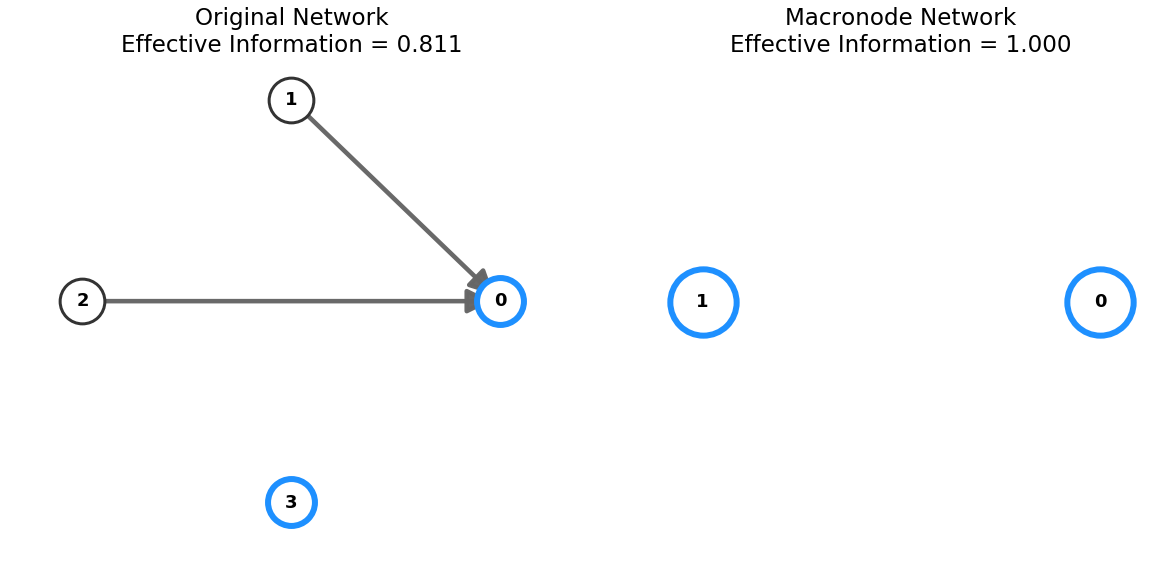

In [27]:
tpm = np.array([[1, 0, 0, 0],
                [1, 0, 0, 0],
                [1, 0, 0, 0],
                [0, 0, 0, 1]])

mG, mapping, G_orig = causal_emergence(tpm,p0)

ns = 2000
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,9))
pos = nx.circular_layout(G_orig)
nx.draw_networkx_nodes(G_orig, pos, node_color='w', node_size=ns, 
                       linewidths=3, ax=ax0).set_edgecolor('#333333')
for eij in G_orig.edges():
    i = eij[0]
    j = eij[1]
    if i==j:
        nx.draw_networkx_nodes(G_orig, pos, nodelist=[i], node_size=ns+ns*.1, node_color='w', 
                       linewidths=6, ax=ax0).set_edgecolor('dodgerblue')

nx.draw_networkx_edges(G_orig, pos, edge_color="#666666",width=4.55, alpha=0.98, ax=ax0, arrowsize=50)
title = "Original Network\nEffective Information = %.3f"%(np.round(get_ei(G_orig,p0),5))
nx.draw_networkx_labels(G_orig, pos, font_size=18, font_color='k', font_weight='bold', ax=ax0)
ax0.set_title(title, size=23)
ax0.axis('off')

ns = 2000
pos = nx.circular_layout(mG)
nx.draw_networkx_nodes(mG, pos, node_color='w', node_size=ns*2, 
                       linewidths=3, ax=ax1).set_edgecolor('#333333')
nx.draw_networkx_edges(mG, pos, edge_color="#666666",width=4.55, alpha=0.98, ax=ax1, arrowsize=50)
for eij in mG.edges():
    i = eij[0]
    j = eij[1]
    if i==j:
        nx.draw_networkx_nodes(mG, pos, nodelist=[i], node_size=(ns+ns*.1)*2, node_color='w',
                       linewidths=6, ax=ax1).set_edgecolor('dodgerblue')

title = "Macronode Network\nEffective Information = %.3f"%(np.round(get_ei(mG,p0),5))
nx.draw_networkx_labels(mG, pos, font_size=18, font_color='k', font_weight='bold', ax=ax1)
ax1.set_title(title, size=23)
ax1.axis('off')

plt.show()

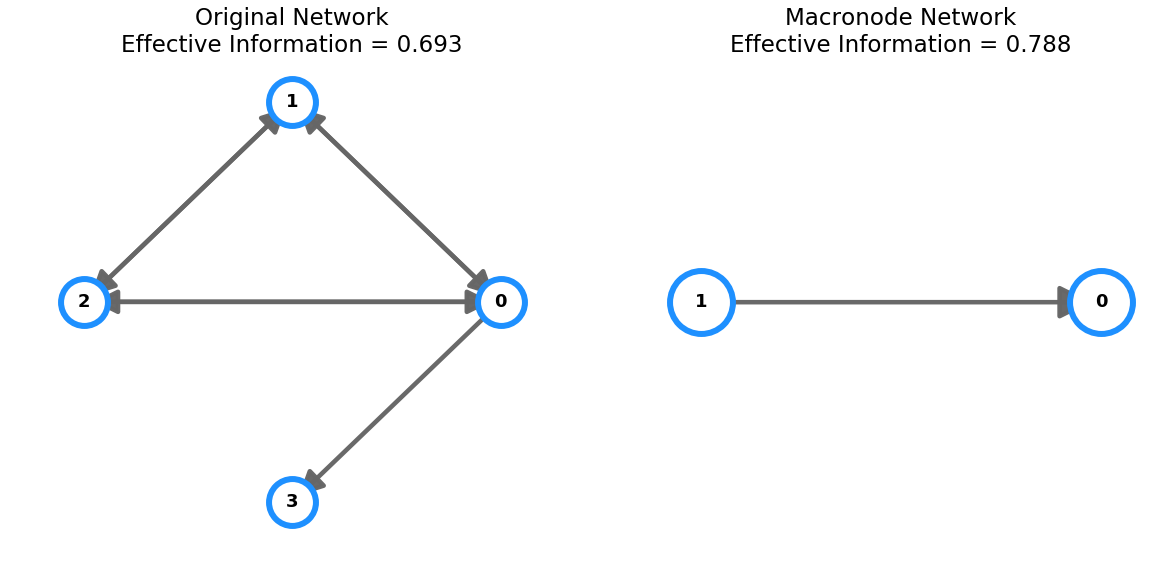

In [28]:
tpm = np.array([[1/4, 1/4, 1/4, 1/4],
                [1/3, 1/3, 1/3, 0],
                [1/3, 1/3, 1/3, 0],
                [0, 0., 0., 1]])

mG, mapping, G_orig = causal_emergence(tpm,p0)

ns = 2000
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,9))
pos = nx.circular_layout(G_orig)
nx.draw_networkx_nodes(G_orig, pos, node_color='w', node_size=ns, 
                       linewidths=3, ax=ax0).set_edgecolor('#333333')
for eij in G_orig.edges():
    i = eij[0]
    j = eij[1]
    if i==j:
        nx.draw_networkx_nodes(G_orig, pos, nodelist=[i], node_size=ns+ns*.1, node_color='w', 
                       linewidths=6, ax=ax0).set_edgecolor('dodgerblue')

nx.draw_networkx_edges(G_orig, pos, edge_color="#666666",width=4.55, alpha=0.98, ax=ax0, arrowsize=50)
title = "Original Network\nEffective Information = %.3f"%(np.round(get_ei(G_orig,p0),5))
nx.draw_networkx_labels(G_orig, pos, font_size=18, font_color='k', font_weight='bold', ax=ax0)
ax0.set_title(title, size=23)
ax0.axis('off')

ns = 2000
pos = nx.circular_layout(mG)
nx.draw_networkx_nodes(mG, pos, node_color='w', node_size=ns*1.8, 
                       linewidths=3, ax=ax1).set_edgecolor('#333333')
nx.draw_networkx_edges(mG, pos, edge_color="#666666",width=4.55, alpha=0.98, ax=ax1, arrowsize=70)
for eij in mG.edges():
    i = eij[0]
    j = eij[1]
    if i==j:
        nx.draw_networkx_nodes(mG, pos, nodelist=[i], node_size=(ns+ns*.1)*1.8, node_color='w',
                       linewidths=6, ax=ax1).set_edgecolor('dodgerblue')

title = "Macronode Network\nEffective Information = %.3f"%(np.round(get_ei(mG,p0),5))
nx.draw_networkx_labels(mG, pos, font_size=18, font_color='k', font_weight='bold', ax=ax1)
ax1.set_title(title, size=23)
ax1.axis('off')

plt.show()

In [50]:
i = 1
np.nonzero(np.array(list(mapping.values())) == max(mapping.keys())+i)[0][0]
# np.array(list(mapping.values())) == max(mapping.keys())+2

3

The original mapping is 	 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19}
The best macro-mapping is	 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 20, 8: 8, 9: 9, 10: 10, 11: 20, 12: 22, 13: 13, 14: 21, 15: 20, 16: 22, 17: 20, 18: 20, 19: 21}
The amount of causal emergence is: 0.1267


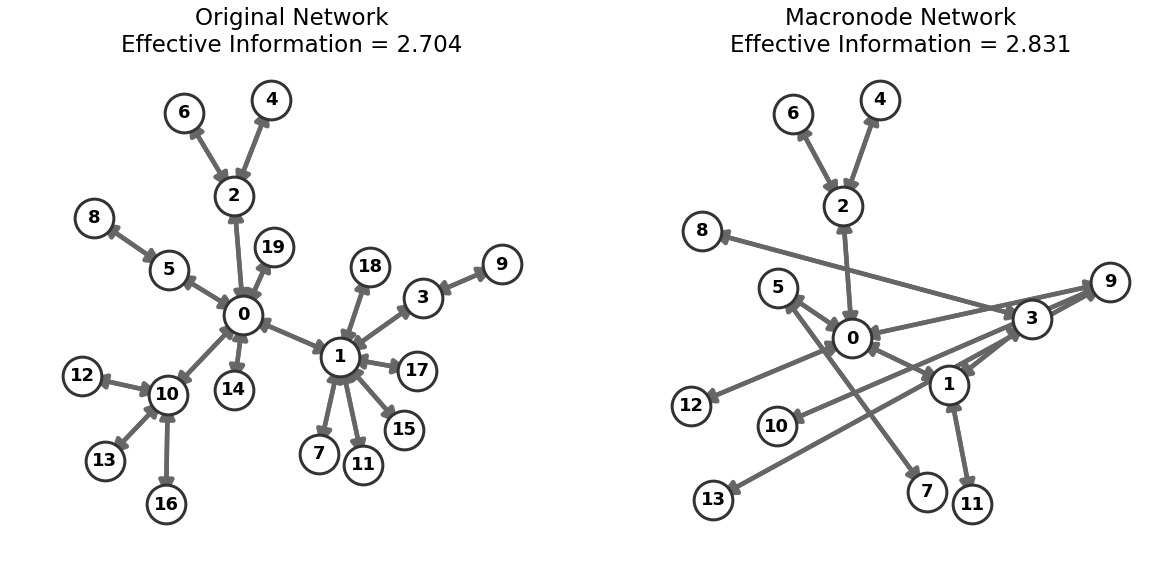

In [79]:
p0 = 0
tpm = nx.barabasi_albert_graph(20,1)

mG, mapping, G_orig = causal_emergence(tpm,p0)

print("The original mapping is \t", dict(zip(G_orig.nodes(), G_orig.nodes())))
print("The best macro-mapping is\t", mapping)
print("The amount of causal emergence is: %.4f" % -(get_ei(G_orig,p0)-get_ei(mG,p0)))
ns = 1500
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,9))
pos = nx.kamada_kawai_layout(G_orig)
# pos = nx.circular_layout(G_orig)
nx.draw_networkx_nodes(G_orig, pos, node_color='w', node_size=ns, 
                       linewidths=3, ax=ax0).set_edgecolor('#333333')
for eij in G_orig.edges():
    i = eij[0]
    j = eij[1]
    if i==j:
        nx.draw_networkx_nodes(G_orig, pos, nodelist=[i], node_size=ns+ns*.1, node_color='w', 
                       linewidths=6, ax=ax0).set_edgecolor('dodgerblue')

nx.draw_networkx_edges(G_orig, pos, edge_color="#666666",width=4.55, alpha=0.98, ax=ax0, arrowsize=30)
title = "Original Network\nEffective Information = %.3f"%(np.round(get_ei(G_orig,p0),5))
nx.draw_networkx_labels(G_orig, pos, font_size=18, font_color='k', font_weight='bold', ax=ax0)
ax0.set_title(title, size=23)
ax0.axis('off')

ns = 1500
pos = nx.kamada_kawai_layout(G_orig)
nx.draw_networkx_nodes(mG, pos, node_color='w', node_size=ns, 
                       linewidths=3, ax=ax1).set_edgecolor('#333333')
nx.draw_networkx_edges(mG, pos, edge_color="#666666",width=4.55, alpha=0.98, ax=ax1, arrowsize=30)
for eij in mG.edges():
    i = eij[0]
    j = eij[1]
    if i==j:
        nx.draw_networkx_nodes(mG, pos, nodelist=[i], node_size=(ns+ns*.1)*1.8, node_color='w',
                       linewidths=6, ax=ax1).set_edgecolor('dodgerblue')



title = "Macronode Network\nEffective Information = %.3f"%(np.round(get_ei(mG,p0),5))
nx.draw_networkx_labels(mG, pos, font_size=18, font_color='k', font_weight='bold', ax=ax1)
ax1.set_title(title, size=23)
ax1.axis('off')

plt.show()